In [718]:
# manpulation
import numpy as np
import pandas as pd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
#import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

In [719]:
# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

from sklearn.base import BaseEstimator, TransformerMixin

# clustring
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# ensambling
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier # Bagging
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

# Loading Data

In [720]:
#  1) loading data
#https://www.kaggle.com/datasets/juhibhojani/house-price
df = pd.read_csv('datasets/house_prices.csv')
df

Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1       One can find this stunning 2 BHK flat for sale...           98 Lac    
2       Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3       This beautiful 1 BHK Flat is available for sal...           25 Lac    
4       This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
...                                                   ...               ...   
187526  This magnificent 3 BHK Flat is available for s...           63 Lac    
187527  Have a look at this immaculate 3 BHK flat for ...           55 Lac    
187528  Gazipur, Zirakpur has an appealing 3 BHK flat ...           76 Lac    
187529  Up for immediate sale is a 2 BHK apartment in ...           30 Lac    
187530  This exquisite 3 BHK Flat is offered for sale ...          1.18 Cr    

        Price (in rupees)  location Carpet Area         Status         Floor  \
0                  6000.0     thane    500 sqft  Ready to Move  10 out of 11   
1                 13799.0     thane    473 sqft  Ready to Move   3 out of 22   
2                 17500.0     thane    779 sqft  Ready to Move  10 out of 29   
3                     NaN     thane    530 sqft  Ready to Move    1 out of 3   
4                 18824.0     thane    635 sqft  Ready to Move  20 out of 42   
...                   ...       ...         ...            ...           ...   
187526             3225.0  zirakpur         NaN  Ready to Move    2 out of 4   
187527             3274.0  zirakpur         NaN  Ready to Move    4 out of 6   
187528             4343.0  zirakpur   1250 sqft  Ready to Move    1 out of 3   
187529             4231.0  zirakpur         NaN  Ready to Move    2 out of 2   
187530             6162.0  zirakpur         NaN  Ready to Move   5 out of 13   

         Transaction  ...        facing             overlooking  \
0             Resale  ...           NaN                     NaN   
1             Resale  ...          East             Garden/Park   
2             Resale  ...          East             Garden/Park   
3             Resale  ...           NaN                     NaN   
4             Resale  ...          West  Garden/Park, Main Road   
...              ...  ...           ...                     ...   
187526  New Property  ...          East             Garden/Park   
187527        Resale  ...  North - East  Garden/Park, Main Road   
187528        Resale  ...          East  Garden/Park, Main Road   
187529        Resale  ...           NaN               Main Road   
187530        Resale  ...  North - East       Garden/Park, Pool   

                                    Society Bathroom Balcony Car Parking  \
0       Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                               Dosti Vihar        2     NaN      1 Open   
2                      Sunrise by Kalpataru        2     NaN   1 Covered   
3                                       NaN        1       1         NaN   
4               TenX Habitat Raymond Realty        2     NaN   1 Covered   
...      

# Understanding Data

In [721]:
df.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

# columns meaning:
1) Index: unique identifier
2) Title: house title
3) Description: house description (BHK is bedroom hall kitche =>no of bed rooms)
4) Amount(in rupees):total amount(Lac = one hundred thousand, Cr = 10 million) 
5) Price (in rupees): price per square foot
6) location: city
7) Carpet Area: area in sqft or other units
8) Status: house status(ready to move)
9) Floor: house floor out of total
10) Transaction: resale or new
11) Furnishing: Furnishing status() 
12) facing: direction of the house
13) overlooking: view
14) Society: district
15) Bathroom : no of bathrooms
16) Balcony : no of Balcony
17) Car Parking	: no of car parking 
18) Ownership : Ownership type
19) Super Area:
20) Dimensions :
21) Plot Area:

# domain knowledge:
- BHK stands for Bedroom, Hall and Kitchen
- Lac is a unit in the Indian numbering system equal to one hundred thousand
- Cr A crore is a unit of measurement commonly used in India, Bangladesh, Nepal, and Pakistan to represent 10 million
- 1 sqft = 0.092903 square metres

In [722]:
df.info()
# most of features are object ====> needs to extract numeric features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [723]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

# Data Cleaning and Features Extraction

In [724]:
df.duplicated().sum()

0

In [725]:
# drop Index column
df = df.drop(["Index"], axis=1)
df

Title  \
0       1 BHK Ready to Occupy Flat for sale in Srushti...   
1       2 BHK Ready to Occupy Flat for sale in Dosti V...   
2       2 BHK Ready to Occupy Flat for sale in Sunrise...   
3             1 BHK Ready to Occupy Flat for sale Kasheli   
4       2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...                                                   ...   
187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1       One can find this stunning 2 BHK flat for sale...           98 Lac    
2       Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3       This beautiful 1 BHK Flat is available for sal...           25 Lac    
4       This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
...                                                   ...               ...   
187526  This magnificent 3 BHK Flat is available for s...           63 Lac    
187527  Have a look at this immaculate 3 BHK flat for ...           55 Lac    
187528  Gazipur, Zirakpur has an appealing 3 BHK flat ...           76 Lac    
187529  Up for immediate sale is a 2 BHK apartment in ...           30 Lac    
187530  This exquisite 3 BHK Flat is offered for sale ...          1.18 Cr    

        Price (in rupees)  location Carpet Area         Status         Floor  \
0                  6000.0     thane    500 sqft  Ready to Move  10 out of 11   
1                 13799.0     thane    473 sqft  Ready to Move   3 out of 22   
2                 17500.0     thane    779 sqft  Ready to Move  10 out of 29   
3                     NaN     thane    530 sqft  Ready to Move    1 out of 3   
4                 18824.0     thane    635 sqft  Ready to Move  20 out of 42   
...                   ...       ...         ...            ...           ...   
187526             3225.0  zirakpur         NaN  Ready to Move    2 out of 4   
187527             3274.0  zirakpur         NaN  Ready to Move    4 out of 6   
187528             4343.0  zirakpur   1250 sqft  Ready to Move    1 out of 3   
187529             4231.0  zirakpur         NaN  Ready to Move    2 out of 2   
187530             6162.0  zirakpur         NaN  Ready to Move   5 out of 13   

         Transaction      Furnishing        facing             overlooking  \
0             Resale     Unfurnished           NaN                     NaN   
1             Resale  Semi-Furnished          East             Garden/Park   
2             Resale     Unfurnished          East             Garden/Park   
3             Resale     Unfurnished           NaN                     NaN   
4             Resale     Unfurnished          West  Garden/Park, Main Road   
...              ...             ...           ...                     ...   
187526  New Property  Semi-Furnished          East             Garden/Park   
187527        Resale     Unfurnished  North - East  Garden/Park, Main Road   
187528        Resale       Furnished          East  Garden/Park, Main Road   
187529        Resale  Semi-Furnished           NaN               Main Road   
187530        Resale  Semi-Furnished  North - East       Garden/Park, Pool   

                                    Society Bathroom Balcony Car Parking  \
0       Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                               Dosti Vihar        2     NaN      1 Open   
2                      Sunrise by Kalpataru        2     NaN   1 Covered   
3                                       NaN        1       1         NaN   
4               TenX Habitat Raymond Realty        2     NaN   1 Covered   
...             

In [726]:
df.duplicated().sum()

119339

In [727]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df

Title  \
0      1 BHK Ready to Occupy Flat for sale in Srushti...   
1      2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            1 BHK Ready to Occupy Flat for sale Kasheli   
4      2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...                                                  ...   
68187  3 BHK Ready to Occupy Flat for sale in Bollywo...   
68188  3 BHK Ready to Occupy Flat for sale in Sushma ...   
68189  3 BHK Ready to Occupy Flat for sale in Bollywo...   
68190  2 BHK Ready to Occupy Flat for sale in Friends...   
68191  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                             Description Amount(in rupees)  \
0      Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1      One can find this stunning 2 BHK flat for sale...           98 Lac    
2      Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3      This beautiful 1 BHK Flat is available for sal...           25 Lac    
4      This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
...                                                  ...               ...   
68187  This magnificent 3 BHK Flat is available for s...           63 Lac    
68188  Have a look at this immaculate 3 BHK flat for ...           55 Lac    
68189  Gazipur, Zirakpur has an appealing 3 BHK flat ...           76 Lac    
68190  Up for immediate sale is a 2 BHK apartment in ...           30 Lac    
68191  This exquisite 3 BHK Flat is offered for sale ...          1.18 Cr    

       Price (in rupees)  location Carpet Area         Status         Floor  \
0                 6000.0     thane    500 sqft  Ready to Move  10 out of 11   
1                13799.0     thane    473 sqft  Ready to Move   3 out of 22   
2                17500.0     thane    779 sqft  Ready to Move  10 out of 29   
3                    NaN     thane    530 sqft  Ready to Move    1 out of 3   
4                18824.0     thane    635 sqft  Ready to Move  20 out of 42   
...                  ...       ...         ...            ...           ...   
68187             3225.0  zirakpur         NaN  Ready to Move    2 out of 4   
68188             3274.0  zirakpur         NaN  Ready to Move    4 out of 6   
68189             4343.0  zirakpur   1250 sqft  Ready to Move    1 out of 3   
68190             4231.0  zirakpur         NaN  Ready to Move    2 out of 2   
68191             6162.0  zirakpur         NaN  Ready to Move   5 out of 13   

        Transaction      Furnishing        facing             overlooking  \
0            Resale     Unfurnished           NaN                     NaN   
1            Resale  Semi-Furnished          East             Garden/Park   
2            Resale     Unfurnished          East             Garden/Park   
3            Resale     Unfurnished           NaN                     NaN   
4            Resale     Unfurnished          West  Garden/Park, Main Road   
...             ...             ...           ...                     ...   
68187  New Property  Semi-Furnished          East             Garden/Park   
68188        Resale     Unfurnished  North - East  Garden/Park, Main Road   
68189        Resale       Furnished          East  Garden/Park, Main Road   
68190        Resale  Semi-Furnished           NaN               Main Road   
68191        Resale  Semi-Furnished  North - East       Garden/Park, Pool   

                                   Society Bathroom Balcony Car Parking  \
0      Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                              Dosti Vihar        2     NaN      1 Open   
2                     Sunrise by Kalpataru        2     NaN   1 Covered   
3                                      NaN        1       1         NaN   
4              TenX Habitat Raymond Realty        2     NaN   1 Covered   
...                                    ...      ...     ...         .

In [728]:
df.duplicated().sum()

0

In [729]:
df.isnull().sum()

Title                    0
Description           2218
Amount(in rupees)        0
Price (in rupees)     5894
location                 0
Carpet Area          30117
Status                 299
Floor                 2615
Transaction             78
Furnishing            1290
facing               26800
overlooking          29535
Society              38820
Bathroom               471
Balcony              19059
Car Parking          39329
Ownership            24928
Super Area           38199
Dimensions           68192
Plot Area            68192
dtype: int64

In [730]:
# extract BHK: to extract the first number found in each string
df['BHK'] = df['Title'].str.extract('(\d+)').astype(float)

In [731]:
df[df['BHK'].isnull()== True][['Title','BHK']]


Title  BHK
115              Studio Apartment for sale Dombivli East  NaN
149               Studio Apartment for sale Vartak Nagar  NaN
150     Studio Apartment for sale in Lok Nagari Phase...  NaN
278                   Studio Apartment for sale Asangaon  NaN
293                       Apartment for sale Kisan Nagar  NaN
...                                                  ...  ...
67141   Studio Apartment for sale in Royale High Stre...  NaN
67713                  Studio Apartment for sale Gazipur  NaN
67843   Studio Apartment for sale in Royale High Stre...  NaN
68038                  Studio Apartment for sale Dhakoli  NaN
68127                 Studio Apartment for sale VIP Road  NaN

[258 rows x 2 columns]

In [732]:
# fill Nan with zero for studio and datatype int
df['BHK'].fillna(0,inplace=True)

df['BHK'] = df['BHK'].astype(int)
df['BHK']

0        1
1        2
2        2
3        1
4        2
        ..
68187    3
68188    3
68189    3
68190    2
68191    3
Name: BHK, Length: 68192, dtype: int32

In [733]:
# handling amount in rupees
df['Amount(in rupees)'].str.extract(r'(\D+)')[0].unique()

array([' Lac ', '.', 'Call for Price', ' Cr '], dtype=object)

In [734]:
df[df['Amount(in rupees)'].str.contains('.')]

Title  \
0      1 BHK Ready to Occupy Flat for sale in Srushti...   
1      2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            1 BHK Ready to Occupy Flat for sale Kasheli   
4      2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...                                                  ...   
68187  3 BHK Ready to Occupy Flat for sale in Bollywo...   
68188  3 BHK Ready to Occupy Flat for sale in Sushma ...   
68189  3 BHK Ready to Occupy Flat for sale in Bollywo...   
68190  2 BHK Ready to Occupy Flat for sale in Friends...   
68191  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                             Description Amount(in rupees)  \
0      Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1      One can find this stunning 2 BHK flat for sale...           98 Lac    
2      Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3      This beautiful 1 BHK Flat is available for sal...           25 Lac    
4      This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
...                                                  ...               ...   
68187  This magnificent 3 BHK Flat is available for s...           63 Lac    
68188  Have a look at this immaculate 3 BHK flat for ...           55 Lac    
68189  Gazipur, Zirakpur has an appealing 3 BHK flat ...           76 Lac    
68190  Up for immediate sale is a 2 BHK apartment in ...           30 Lac    
68191  This exquisite 3 BHK Flat is offered for sale ...          1.18 Cr    

       Price (in rupees)  location Carpet Area         Status         Floor  \
0                 6000.0     thane    500 sqft  Ready to Move  10 out of 11   
1                13799.0     thane    473 sqft  Ready to Move   3 out of 22   
2                17500.0     thane    779 sqft  Ready to Move  10 out of 29   
3                    NaN     thane    530 sqft  Ready to Move    1 out of 3   
4                18824.0     thane    635 sqft  Ready to Move  20 out of 42   
...                  ...       ...         ...            ...           ...   
68187             3225.0  zirakpur         NaN  Ready to Move    2 out of 4   
68188             3274.0  zirakpur         NaN  Ready to Move    4 out of 6   
68189             4343.0  zirakpur   1250 sqft  Ready to Move    1 out of 3   
68190             4231.0  zirakpur         NaN  Ready to Move    2 out of 2   
68191             6162.0  zirakpur         NaN  Ready to Move   5 out of 13   

        Transaction      Furnishing  ...             overlooking  \
0            Resale     Unfurnished  ...                     NaN   
1            Resale  Semi-Furnished  ...             Garden/Park   
2            Resale     Unfurnished  ...             Garden/Park   
3            Resale     Unfurnished  ...                     NaN   
4            Resale     Unfurnished  ...  Garden/Park, Main Road   
...             ...             ...  ...                     ...   
68187  New Property  Semi-Furnished  ...             Garden/Park   
68188        Resale     Unfurnished  ...  Garden/Park, Main Road   
68189        Resale       Furnished  ...  Garden/Park, Main Road   
68190        Resale  Semi-Furnished  ...               Main Road   
68191        Resale  Semi-Furnished  ...       Garden/Park, Pool   

                                   Society Bathroom Balcony Car Parking  \
0      Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                              Dosti Vihar        2     NaN      1 Open   
2                     Sunrise by Kalpataru        2     NaN   1 Covered   
3                                      NaN        1       1         NaN   
4              TenX Habitat Raymond Realty        2     NaN   1 Covered   
...                                    ...      ...     ...         ...   
68187                    Bollywood Esencia        3       3   1 Covered   
68188                   Sus

In [735]:

def convert_to_lac(value):
    if 'Lac' in value:
        return int(float(value.replace('Lac','')))
    elif 'Cr' in value:
        return int(float(value.replace('Cr',''))*100)
    elif 'Call for Price' in value:
        return np.nan
    else:
        return int(float(value))

df['Amount (Lac)'] = df['Amount(in rupees)'].apply(convert_to_lac)

In [736]:
df[['Amount(in rupees)','Amount (Lac)']]
df[df['Amount (Lac)'].isnull()][['Amount(in rupees)','Amount (Lac)']]

Amount(in rupees)  Amount (Lac)
24       Call for Price           NaN
37       Call for Price           NaN
83       Call for Price           NaN
131      Call for Price           NaN
177      Call for Price           NaN
...                 ...           ...
68065    Call for Price           NaN
68103    Call for Price           NaN
68164    Call for Price           NaN
68167    Call for Price           NaN
68174    Call for Price           NaN

[2937 rows x 2 columns]

In [737]:
# check : Amount(Lac)	= Price (in rupees)	*	Carpet Area	for 3 rows
#42 Lac	6000.0		500 sqft : 6000*500=3000000=30 lac
# 98 Lac	13799.0		473 sqft : 13799 *473 = 6,526,927 = 65.2 lac
# 1.40 Cr	17500.0		779 sqft : 17500*779 = 13,632,500 = 1.3 cr
# extract price per sqft = Amount(Lac)/carpet Area sqft
# delete Price (in rupees)



In [738]:
# handling carpet area
other_units = df['Carpet Area'].str.extract(r'(\D+)')[0].unique()

other_units


array([' sqft', nan, ' sqm', ' sqyrd', ' acre', ' ground', ' cent',
       ' bigha', ' marla', ' kanal'], dtype=object)

In [739]:
def transform_area(area):
    if pd.notna(area):
        value, unit = area.split()
        value = float(value)
        if unit == 'sqft':
            return value
        elif unit == 'sqyrd':
            return value * 9
        elif unit == 'sqm':
            return value * 10.7
        elif unit == 'marla':
            return value * 272.2
        elif unit == 'acre':
            return value * 43560
        elif unit == 'kanal':
            return value * 5445
        elif unit == 'ground':
            return value * 2400
        elif unit == 'cent':
            return value * 435.5
        elif unit == 'bigha':
            return value * 27000
        elif unit == 'aankadam ':
            return value * 72                 
    return None

df['Carpet Area Sqft'] = df['Carpet Area'].apply(transform_area)

In [740]:
df[df['Carpet Area Sqft'].isnull()== True][['Carpet Area','Carpet Area Sqft']]

Carpet Area  Carpet Area Sqft
5             NaN               NaN
7             NaN               NaN
8             NaN               NaN
11            NaN               NaN
12            NaN               NaN
...           ...               ...
68182         NaN               NaN
68187         NaN               NaN
68188         NaN               NaN
68190         NaN               NaN
68191         NaN               NaN

[30117 rows x 2 columns]

In [741]:
# handling super area
other_units = df['Super Area'].str.extract(r'(\D+)')[0].unique()

other_units

array([nan, ' sqft', ',', ' sqm', ' sqyrd', ' marla', ' kanal', ' ground',
       ' biswa', ' aankadam', ' acre', ' hectare', ' cent'], dtype=object)

In [742]:
# search for biswa
# biswa_count=df['Super Area'].str.contains('biswa').sum()
# biswa_count
#df[(df['Super Area'].str.contains('biswa'))]
df[(df['Super Area'].str.contains('biswa')) & (df['Super Area'].isnull()==False)]['Super Area']


52946    1970 biswa2
Name: Super Area, dtype: object

In [743]:
# 1 row and its (biswa2) but biswa = 1350 sqft => delete it
biswa_area = df[(df['Super Area'].str.contains('biswa')) & (df['Super Area'].isnull()==False)].index
df.drop(biswa_area , inplace=True)
df.reset_index(drop=True,inplace=True)
df

Title  \
0      1 BHK Ready to Occupy Flat for sale in Srushti...   
1      2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            1 BHK Ready to Occupy Flat for sale Kasheli   
4      2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...                                                  ...   
68186  3 BHK Ready to Occupy Flat for sale in Bollywo...   
68187  3 BHK Ready to Occupy Flat for sale in Sushma ...   
68188  3 BHK Ready to Occupy Flat for sale in Bollywo...   
68189  2 BHK Ready to Occupy Flat for sale in Friends...   
68190  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                             Description Amount(in rupees)  \
0      Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1      One can find this stunning 2 BHK flat for sale...           98 Lac    
2      Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3      This beautiful 1 BHK Flat is available for sal...           25 Lac    
4      This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
...                                                  ...               ...   
68186  This magnificent 3 BHK Flat is available for s...           63 Lac    
68187  Have a look at this immaculate 3 BHK flat for ...           55 Lac    
68188  Gazipur, Zirakpur has an appealing 3 BHK flat ...           76 Lac    
68189  Up for immediate sale is a 2 BHK apartment in ...           30 Lac    
68190  This exquisite 3 BHK Flat is offered for sale ...          1.18 Cr    

       Price (in rupees)  location Carpet Area         Status         Floor  \
0                 6000.0     thane    500 sqft  Ready to Move  10 out of 11   
1                13799.0     thane    473 sqft  Ready to Move   3 out of 22   
2                17500.0     thane    779 sqft  Ready to Move  10 out of 29   
3                    NaN     thane    530 sqft  Ready to Move    1 out of 3   
4                18824.0     thane    635 sqft  Ready to Move  20 out of 42   
...                  ...       ...         ...            ...           ...   
68186             3225.0  zirakpur         NaN  Ready to Move    2 out of 4   
68187             3274.0  zirakpur         NaN  Ready to Move    4 out of 6   
68188             4343.0  zirakpur   1250 sqft  Ready to Move    1 out of 3   
68189             4231.0  zirakpur         NaN  Ready to Move    2 out of 2   
68190             6162.0  zirakpur         NaN  Ready to Move   5 out of 13   

        Transaction      Furnishing  ... Bathroom Balcony Car Parking  \
0            Resale     Unfurnished  ...        1       2         NaN   
1            Resale  Semi-Furnished  ...        2     NaN      1 Open   
2            Resale     Unfurnished  ...        2     NaN   1 Covered   
3            Resale     Unfurnished  ...        1       1         NaN   
4            Resale     Unfurnished  ...        2     NaN   1 Covered   
...             ...             ...  ...      ...     ...         ...   
68186  New Property  Semi-Furnished  ...        3       3   1 Covered   
68187        Resale     Unfurnished  ...        3     NaN   1 Covered   
68188        Resale       Furnished  ...        3       2  1 Covered,   
68189        Resale  Semi-Furnished  ...        2     NaN         NaN   
68190        Resale  Semi-Furnished  ...        4       4   1 Covered   

                  Ownership Super Area Dimensions Plot Area BHK  Amount (Lac)  \
0                       NaN        NaN        NaN       NaN   1          42.0   
1                  Freehold        NaN        NaN       NaN   2          98.0   
2                  Freehold        NaN        NaN       NaN   2         140.0   
3                       NaN        NaN        NaN       NaN   1          25.0   
4      Co-operative Society        NaN        NaN       NaN   2         160.0   
...                     ...        ...        ...       ...  ..           ...   


In [744]:
# handling super area
df['Super Area'] = df['Super Area'].str.replace(',', '', regex=True)
df['Super Area Sqft'] = df['Super Area'].apply(transform_area)

In [745]:
df['Super Area Sqft'].isnull().sum()

38201

In [746]:
df[['Carpet Area Sqft','Super Area Sqft']]

Carpet Area Sqft  Super Area Sqft
0                 500.0              NaN
1                 473.0              NaN
2                 779.0              NaN
3                 530.0              NaN
4                 635.0              NaN
...                 ...              ...
68186               NaN           1953.0
68187               NaN           1680.0
68188            1250.0              NaN
68189               NaN            709.0
68190               NaN           1915.0

[68191 rows x 2 columns]

In [747]:
df[df['Carpet Area Sqft'].isnull()][['Carpet Area Sqft','Super Area Sqft']]

Carpet Area Sqft  Super Area Sqft
5                   NaN            680.0
7                   NaN            575.0
8                   NaN            600.0
11                  NaN           1165.0
12                  NaN            844.0
...                 ...              ...
68181               NaN           2029.0
68186               NaN           1953.0
68187               NaN           1680.0
68189               NaN            709.0
68190               NaN           1915.0

[30116 rows x 2 columns]

In [748]:
# we can fill nans of 'carpet area sqft' (30116) with 'Super Area Sqft' because nan in carpet area , not nan in super area and vice versa
#df[(df['Carpet Area Sqft'].isna()) & (df['Super Area Sqft'].isna())]# 127 rows
# #drop 127 nan rows , then fill nan in carpet area with super area , then drop super area
# # handling carpet area :drop 127 rows nans
nans_area = df[(df['Carpet Area Sqft'].isna()) & (df['Super Area Sqft'].isna())].index
df.drop(nans_area , inplace=True)
df.reset_index(drop=True,inplace=True)
# # fill nan in carpet area with values in super area
df['Carpet Area Sqft'] = np.where((df['Carpet Area Sqft'].isna()), df['Super Area Sqft'], df['Carpet Area Sqft'])


In [749]:
df.isnull().sum()

Title                    0
Description           2216
Amount(in rupees)        0
Price (in rupees)     5768
location                 0
Carpet Area          29990
Status                 299
Floor                 2578
Transaction             78
Furnishing            1268
facing               26694
overlooking          29429
Society              38743
Bathroom               453
Balcony              19009
Car Parking          39237
Ownership            24832
Super Area           38075
Dimensions           68065
Plot Area            68065
BHK                      0
Amount (Lac)          2899
Carpet Area Sqft         0
Super Area Sqft      38075
dtype: int64

In [750]:
# extract price per sqft
# df['Price per sqft'] = df['Amount (Lac)']*100000/df['Carpet Area Sqft']
# df

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68065 entries, 0 to 68064
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68065 non-null  object 
 1   Description        65849 non-null  object 
 2   Amount(in rupees)  68065 non-null  object 
 3   Price (in rupees)  62297 non-null  float64
 4   location           68065 non-null  object 
 5   Carpet Area        38075 non-null  object 
 6   Status             67766 non-null  object 
 7   Floor              65487 non-null  object 
 8   Transaction        67987 non-null  object 
 9   Furnishing         66797 non-null  object 
 10  facing             41371 non-null  object 
 11  overlooking        38636 non-null  object 
 12  Society            29322 non-null  object 
 13  Bathroom           67612 non-null  object 
 14  Balcony            49056 non-null  object 
 15  Car Parking        28828 non-null  object 
 16  Ownership          432

In [752]:
# handling floor
#df[df["Floor"].str.contains("out of") == False]
df['Floor'].unique()

array(['10 out of 11', '3 out of 22', '10 out of 29', '1 out of 3',
       '20 out of 42', '2 out of 7', '4 out of 5', 'Ground out of 7',
       'Ground out of 2', '3 out of 27', '6 out of 20', '16 out of 24',
       '8 out of 20', '18 out of 27', '2 out of 3', '10 out of 16',
       '5 out of 7', '20 out of 28', '3 out of 3', '3 out of 7',
       '15 out of 31', '2 out of 28', '27 out of 27', '6 out of 7',
       '5 out of 5', '3 out of 8', '11 out of 17', '9 out of 24',
       '16 out of 27', '14 out of 29', '12 out of 27', '1 out of 27',
       '2 out of 4', '16 out of 38', '3 out of 4', '2 out of 17',
       '12 out of 28', '3 out of 19', '6 out of 28', '1 out of 4',
       '7 out of 16', '2 out of 2', '1 out of 9', '7 out of 12',
       '10 out of 10', '4 out of 4', '14 out of 17', '21 out of 27',
       '5 out of 8', '7 out of 30', '6 out of 18', '14 out of 28',
       '3 out of 5', '2 out of 24', '1 out of 8', '2 out of 16',
       '7 out of 7', '4 out of 28', '4 out of 26', '1 

In [753]:

#df['Floor']
# split floor on 'out of'
#df[df["Floor"].str.contains("out of") == False]
df[['floor_no' ,'floor_total']]=df['Floor'].str.split(' out of ', expand=True)

#df[df["floor_no"].str.contains("Basement") == True]




# replace lower basement with -2 and upper basement with -1 and Ground with 0
df['floor_no'] = np.where((df['floor_no'] == 'Upper Basement') , '-1', df['floor_no'])
df['floor_no'] = np.where((df['floor_no'] == 'Lower Basement') , '-2', df['floor_no'])
df['floor_no'] = np.where((df['floor_no'] == 'Ground') , '0', df['floor_no'])

# replace 0 in floor_no where 0 in Floor
#df['floor_no'] = np.where((df['Floor'] == 0) , '0', df['floor_no'])


In [754]:
df['floor_no'].unique()

array(['10', '3', '1', '20', '2', '4', '0', '6', '16', '8', '18', '5',
       '15', '27', '11', '9', '14', '12', '7', '21', '-1', nan, '29',
       '13', '19', '17', '28', '30', '23', '25', '26', '24', '22', '50',
       '32', '33', '-2', '40', '35', '42', '63', '38', '34', '60', '31',
       '37', '75', '70', '39', '44', '46', '36', '59', '45', '51', '200'],
      dtype=object)

In [755]:
#data type to float
df['floor_no']= df['floor_no'].astype(float)
df['floor_total']= df['floor_total'].astype(float)

In [756]:
# handling transaction
df['Transaction'].unique()

array(['Resale', 'New Property', nan, 'Other', 'Rent/Lease'], dtype=object)

In [757]:

#df[df['Transaction']=='Other']#=======> 60 rows (replace them with nan)
df['Transaction'] = np.where((df['Transaction'] == 'Other'), np.nan, df['Transaction'])

In [758]:
# handling furnishing
#df['Furnishing'].unique()
df['Furnishing'].value_counts()

Furnishing
Semi-Furnished    29205
Unfurnished       28496
Furnished          9096
Name: count, dtype: int64

In [759]:
#df['overlooking'].value_counts()
#df['overlooking'].nunique()# =====>19
df['overlooking'].unique()

array([nan, 'Garden/Park', 'Garden/Park, Main Road', 'Main Road',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Pool, Main Road',
       'Garden/Park, Pool', 'Main Road, Garden/Park',
       'Main Road, Garden/Park, Pool', 'Pool, Garden/Park', 'Pool',
       'Garden/Park, Main Road, Pool', 'Pool, Main Road',
       'Main Road, Pool, Garden/Park', 'Pool, Main Road, Garden/Park',
       'Main Road, Not Available', 'Main Road, Pool',
       'Garden/Park, Pool, Main Road, Not Available',
       'Garden/Park, Not Available', 'Pool, Main Road, Not Available'],
      dtype=object)

In [760]:
# handling overlooking
#df['overlooking'].value_counts()
#df['overlooking'].nunique()# =====>19

################################7
 
# 'Garden/Park, Pool, Main Road',
# 'Garden/Park, Pool, Main Road, Not Available'
# 'Garden/Park, Main Road, Pool',
# 'Main Road, Garden/Park, Pool',
# 'Main Road, Pool, Garden/Park', 
# 'Pool, Main Road, Garden/Park',
# 'Pool, Garden/Park, Main Road',=======> target
####################################7
#'Garden/Park, Pool',===============>target
#'Pool, Garden/Park', 

#'Garden/Park, Main Road', =========> target
# 'Main Road, Garden/Park',

#'Main Road, Pool',==================> target
#'Pool, Main Road',
#'Pool, Main Road, Not Available' 

#####################################5
#'Main Road', =========================>target
#'Main Road, Not Available',
#'Garden/Park',========================>target
#'Garden/Park, Not Available',
# 'Pool'===============================>target

#####################################################################################################
# to get 7 targets uniques

# replace   3 
df['overlooking'] = np.where((df['overlooking'] == 'Garden/Park, Pool, Main Road')  ,'Pool, Garden/Park, Main Road', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Garden/Park, Main Road, Pool')  ,'Pool, Garden/Park, Main Road', df['overlooking'])
#df['overlooking'] = np.where((df['overlooking'] == 'Pool, Garden/Park, Main Road')  ,'Pool, Garden/Park, Main Road', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Pool, Main Road, Garden/Park')  ,'Pool, Garden/Park, Main Road', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Main Road, Garden/Park, Pool')  ,'Pool, Garden/Park, Main Road', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Main Road, Pool, Garden/Park')  ,'Pool, Garden/Park, Main Road', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Garden/Park, Pool, Main Road, Not Available')  ,'Pool, Garden/Park, Main Road', df['overlooking'])
#replace 2
df['overlooking'] = np.where((df['overlooking'] == 'Garden/Park, Main Road')  ,'Main Road, Garden/Park', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Garden/Park, Pool')  ,'Pool, Garden/Park', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Pool, Main Road')  ,'Main Road, Pool', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Pool, Main Road, Not Available')  ,'Main Road, Pool', df['overlooking'])

#replace 1
df['overlooking'] = np.where((df['overlooking'] == 'Garden/Park, Not Available')  ,'Garden/Park', df['overlooking'])
df['overlooking'] = np.where((df['overlooking'] == 'Main Road, Not Available')  ,'Main Road', df['overlooking'])


In [761]:
#df['overlooking'].value_counts()
df['overlooking'].nunique()

7

In [762]:
# handling car parking
df['Car Parking'].unique()

array([nan, '1 Open', '1 Covered', '2 Covered', '66 Covered',
       '701 Covered', '3 Covered', '1 Covered,', '35 Open', '4 Open',
       '323 Covered', '4 Covered,', '11 Covered', '103 Open',
       '203 Covered', '2 Open', '180 Covered', '14 Open', '50 Open',
       '10 Covered', '15 Open', '5 Open', '7 Covered', '4 Covered',
       '509 Covered,', '101 Covered', '5 Covered,', '6 Covered,',
       '3 Covered,', '123 Covered', '505 Covered', '402 Covered',
       '8 Covered', '6 Covered', '5 Covered', '2 Covered,', '103 Covered',
       '12 Covered,', '202 Open', '202 Covered', '20 Covered,',
       '503 Open', '401 Covered', '3 Open', '501 Covered', '10 Covered,',
       '147 Covered', '20 Covered', '310 Covered', '204 Covered',
       '313 Covered', '302 Covered', '442 Covered', '23 Covered',
       '201 Covered,', '8 Open', '112 Covered', '14 Covered',
       '706 Covered', '107 Covered', '120 Covered', '250 Covered',
       '255 Covered', '11 Open', '217 Covered', '12 Covered',
 

In [763]:
# handling car parking: extract (car_parking_no , car_parking_type)split car parking on " " 
df[['car_parking_no' ,'car_parking_type']]=df['Car Parking'].str.split(' ', expand=True)
# df['car_parking_type'].unique()
df['car_parking_type'] = np.where((df['car_parking_type']=='Covered,'), 'Covered', df['car_parking_type'])
df['car_parking_type'].unique()
# df.isnull().sum()


array([nan, 'Open', 'Covered'], dtype=object)

In [764]:
#check status
df[df["Status"].str.contains("Ready to Move") == False]

Empty DataFrame
Columns: [Title, Description, Amount(in rupees), Price (in rupees), location, Carpet Area, Status, Floor, Transaction, Furnishing, facing, overlooking, Society, Bathroom, Balcony, Car Parking, Ownership, Super Area, Dimensions, Plot Area, BHK, Amount (Lac), Carpet Area Sqft, Super Area Sqft, floor_no, floor_total, car_parking_no, car_parking_type]
Index: []

[0 rows x 28 columns]

In [765]:
# check location
df['location'].nunique()# 81 unique
df['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [766]:
#check facing
df['facing'].unique()

array([nan, 'East', 'West', 'North - East', 'North', 'North - West',
       'South', 'South -West', 'South - East'], dtype=object)

In [767]:
df['facing'].value_counts()

facing
East            18992
North - East     8641
North            5641
West             3296
South            1688
South - East     1255
North - West     1188
South -West       670
Name: count, dtype: int64

In [768]:
# check society======>drop column
df['Society'].nunique()

10352

In [769]:
df[df['location']=='zirakpur']['Society']

66537     Chinar Apartments
66538                   NaN
66539                   NaN
66540                Elanza
66541      Victoria Heights
                ...        
68060     Bollywood Esencia
68061    Sushma Urban Views
68062     Bollywood Esencia
68063       Friends Enclave
68064       Affinity Greens
Name: Society, Length: 1528, dtype: object

In [770]:
#check bathroom 

#df.Bathroom.dtypes
#df['Bathroom'].unique()
df['Bathroom'] = np.where((df['Bathroom'] == '> 10'), '11', df['Bathroom'])

In [771]:
# check Balacony
# df['Balcony']
#df['Balcony'].unique()
#df[df['Balcony']=='> 10' ]#========>13 rows replace with 10
df['Balcony'] = np.where((df['Balcony'] == '> 10'), '11', df['Balcony'])

In [772]:
#check ownership
df['Ownership'].nunique()
df['Ownership'].value_counts()

Ownership
Freehold                37317
Leasehold                3069
Co-operative Society     2365
Power Of Attorney         482
Name: count, dtype: int64

In [773]:
# drop columns 
# unnecessary :Description,Society,
# extract column from it : Title ,Amount(in rupees),Floor,Super Area,Carpet Area,Car Parking,Super Area Sqft 
# nan > 90% : 'Dimensions','Plot Area'
df= df.drop(['Description','Society','Title','Amount(in rupees)','Floor','Super Area','Carpet Area','Car Parking','Dimensions','Plot Area','Super Area Sqft'], axis=1)


In [774]:
df.duplicated().sum()


1217

In [775]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [776]:
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
66843             3225.0  zirakpur  Ready to Move  New Property   
66844             3274.0  zirakpur  Ready to Move        Resale   
66845             4343.0  zirakpur  Ready to Move        Resale   
66846             4231.0  zirakpur  Ready to Move        Resale   
66847             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking Bathroom Balcony  \
0         Unfurnished           NaN                     NaN        1       2   
1      Semi-Furnished          East             Garden/Park        2     NaN   
2         Unfurnished          East             Garden/Park        2     NaN   
3         Unfurnished           NaN                     NaN        1       1   
4         Unfurnished          West  Main Road, Garden/Park        2     NaN   
...               ...           ...                     ...      ...     ...   
66843  Semi-Furnished          East             Garden/Park        3       3   
66844     Unfurnished  North - East  Main Road, Garden/Park        3     NaN   
66845       Furnished          East  Main Road, Garden/Park        3       2   
66846  Semi-Furnished           NaN               Main Road        2     NaN   
66847  Semi-Furnished  North - East       Pool, Garden/Park        4       4   

                  Ownership  BHK  Amount (Lac)  Carpet Area Sqft  floor_no  \
0                       NaN    1          42.0             500.0      10.0   
1                  Freehold    2          98.0             473.0       3.0   
2                  Freehold    2         140.0             779.0      10.0   
3                       NaN    1          25.0             530.0       1.0   
4      Co-operative Society    2         160.0             635.0      20.0   
...                     ...  ...           ...               ...       ...   
66843              Freehold    3          63.0            1953.0       2.0   
66844                   NaN    3          55.0            1680.0       4.0   
66845              Freehold    3          76.0            1250.0       1.0   
66846                   NaN    2          30.0             709.0       2.0   
66847              Freehold    3         118.0            1915.0       5.0   

       floor_total car_parking_no car_parking_type  
0             11.0            NaN              NaN  
1             22.0              1             Open  
2             29.0              1          Covered  
3              3.0            NaN              NaN  
4             42.0              1          Covered  
...            ...            ...              ...  
66843          4.0              1          Covered  
66844          6.0              1          Covered  
66845          3.0              1          Covered  
66846          2.0            NaN              NaN  
66847         13.0              1          Covered  

[66848 rows x 17 columns]

In [777]:
#check data type
# 66847 rows
df.info()
# bathroom ,balacony,car_parking_no=====>float



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66848 entries, 0 to 66847
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price (in rupees)  61141 non-null  float64
 1   location           66848 non-null  object 
 2   Status             66549 non-null  object 
 3   Transaction        66710 non-null  object 
 4   Furnishing         65608 non-null  object 
 5   facing             40590 non-null  object 
 6   overlooking        37898 non-null  object 
 7   Bathroom           66417 non-null  object 
 8   Balcony            48224 non-null  object 
 9   Ownership          42424 non-null  object 
 10  BHK                66848 non-null  int32  
 11  Amount (Lac)       63993 non-null  float64
 12  Carpet Area Sqft   66848 non-null  float64
 13  floor_no           64351 non-null  float64
 14  floor_total        64308 non-null  float64
 15  car_parking_no     28145 non-null  object 
 16  car_parking_type   281

In [778]:
df.isnull().sum()

Price (in rupees)     5707
location                 0
Status                 299
Transaction            138
Furnishing            1240
facing               26258
overlooking          28950
Bathroom               431
Balcony              18624
Ownership            24424
BHK                      0
Amount (Lac)          2855
Carpet Area Sqft         0
floor_no              2497
floor_total           2540
car_parking_no       38703
car_parking_type     38703
dtype: int64

In [779]:
# check datatype

#  bathroom,balacony,car_parking_no=====>float


df['Balcony']= df['Balcony'].astype(float)
df['car_parking_no']= df['car_parking_no'].astype(float)
df['Bathroom']= df['Bathroom'].astype(float)




In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66848 entries, 0 to 66847
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price (in rupees)  61141 non-null  float64
 1   location           66848 non-null  object 
 2   Status             66549 non-null  object 
 3   Transaction        66710 non-null  object 
 4   Furnishing         65608 non-null  object 
 5   facing             40590 non-null  object 
 6   overlooking        37898 non-null  object 
 7   Bathroom           66417 non-null  float64
 8   Balcony            48224 non-null  float64
 9   Ownership          42424 non-null  object 
 10  BHK                66848 non-null  int32  
 11  Amount (Lac)       63993 non-null  float64
 12  Carpet Area Sqft   66848 non-null  float64
 13  floor_no           64351 non-null  float64
 14  floor_total        64308 non-null  float64
 15  car_parking_no     28145 non-null  float64
 16  car_parking_type   281

In [781]:
df.describe()

Price (in rupees)      Bathroom       Balcony            BHK  \
count       6.114100e+04  66417.000000  48224.000000   66848.000000   
mean        6.824634e+03      2.407080      2.081038       5.869345   
std         4.496437e+04      0.898994      1.018801     854.779535   
min         0.000000e+00      1.000000      1.000000       0.000000   
25%         3.833000e+03      2.000000      1.000000       2.000000   
50%         5.072000e+03      2.000000      2.000000       3.000000   
75%         7.113000e+03      3.000000      3.000000       3.000000   
max         6.700000e+06     11.000000     11.000000  221005.000000   

        Amount (Lac)  Carpet Area Sqft      floor_no   floor_total  \
count   63993.000000      6.684800e+04  64351.000000  64308.000000   
mean      106.837248      2.302929e+04      4.313499      8.524445   
std       635.206649      4.932727e+06      4.443816      6.975893   
min         1.000000      1.000000e+00     -2.000000      1.000000   
25%        41.000000      8.500000e+02      2.000000      4.000000   
50%        65.000000      1.150000e+03      3.000000      5.000000   
75%       109.000000      1.546000e+03      5.000000     12.000000   
max    140030.000000      1.272096e+09    200.000000    200.000000   

       car_parking_no  
count    28145.000000  
mean         4.057097  
std         34.357265  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max        999.000000

In [782]:
# drop 19 rows
more_50 = df[df['BHK']>50].index

df.drop(more_50 , inplace=True)
df.reset_index(drop=True,inplace=True)
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
66824             3225.0  zirakpur  Ready to Move  New Property   
66825             3274.0  zirakpur  Ready to Move        Resale   
66826             4343.0  zirakpur  Ready to Move        Resale   
66827             4231.0  zirakpur  Ready to Move        Resale   
66828             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
66824  Semi-Furnished          East             Garden/Park       3.0   
66825     Unfurnished  North - East  Main Road, Garden/Park       3.0   
66826       Furnished          East  Main Road, Garden/Park       3.0   
66827  Semi-Furnished           NaN               Main Road       2.0   
66828  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
66824      3.0              Freehold    3          63.0            1953.0   
66825      NaN                   NaN    3          55.0            1680.0   
66826      2.0              Freehold    3          76.0            1250.0   
66827      NaN                   NaN    2          30.0             709.0   
66828      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type  
0          10.0         11.0             NaN              NaN  
1           3.0         22.0             1.0             Open  
2          10.0         29.0             1.0          Covered  
3           1.0          3.0             NaN              NaN  
4          20.0         42.0             1.0          Covered  
...         ...          ...             ...              ...  
66824       2.0          4.0             1.0          Covered  
66825       4.0          6.0             1.0          Covered  
66826       1.0          3.0             1.0          Covered  
66827       2.0          2.0             NaN              NaN  
66828       5.0         13.0             1.0          Covered  

[66829 rows x 17 columns]

In [783]:
df[df['Carpet Area Sqft'] <100][['Carpet Area Sqft']].count()

Carpet Area Sqft    129
dtype: int64

In [784]:
# drop 129 rows(100 sqft means 9.3 sm)
less_100 = df[df['Carpet Area Sqft']<100].index
df.drop(less_100 , inplace=True)
df.reset_index(drop=True,inplace=True)
df


Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
66695             3225.0  zirakpur  Ready to Move  New Property   
66696             3274.0  zirakpur  Ready to Move        Resale   
66697             4343.0  zirakpur  Ready to Move        Resale   
66698             4231.0  zirakpur  Ready to Move        Resale   
66699             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
66695  Semi-Furnished          East             Garden/Park       3.0   
66696     Unfurnished  North - East  Main Road, Garden/Park       3.0   
66697       Furnished          East  Main Road, Garden/Park       3.0   
66698  Semi-Furnished           NaN               Main Road       2.0   
66699  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
66695      3.0              Freehold    3          63.0            1953.0   
66696      NaN                   NaN    3          55.0            1680.0   
66697      2.0              Freehold    3          76.0            1250.0   
66698      NaN                   NaN    2          30.0             709.0   
66699      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type  
0          10.0         11.0             NaN              NaN  
1           3.0         22.0             1.0             Open  
2          10.0         29.0             1.0          Covered  
3           1.0          3.0             NaN              NaN  
4          20.0         42.0             1.0          Covered  
...         ...          ...             ...              ...  
66695       2.0          4.0             1.0          Covered  
66696       4.0          6.0             1.0          Covered  
66697       1.0          3.0             1.0          Covered  
66698       2.0          2.0             NaN              NaN  
66699       5.0         13.0             1.0          Covered  

[66700 rows x 17 columns]

In [785]:
df.describe()

Price (in rupees)      Bathroom       Balcony           BHK  \
count       6.102900e+04  66271.000000  48123.000000  66700.000000   
mean        6.697589e+03      2.408716      2.082622      2.540570   
std         4.083665e+04      0.898228      1.018934      0.949585   
min         0.000000e+00      1.000000      1.000000      0.000000   
25%         3.833000e+03      2.000000      1.000000      2.000000   
50%         5.069000e+03      2.000000      2.000000      3.000000   
75%         7.107000e+03      3.000000      3.000000      3.000000   
max         6.700000e+06     11.000000     11.000000     49.000000   

        Amount (Lac)  Carpet Area Sqft      floor_no   floor_total  \
count   63871.000000      6.670000e+04  64203.000000  64160.000000   
mean      106.843153      2.307982e+04      4.317337      8.530580   
std       635.037008      4.938197e+06      4.446562      6.976125   
min         1.000000      1.000000e+02     -2.000000      1.000000   
25%        41.000000      8.500000e+02      2.000000      4.000000   
50%        65.000000      1.150000e+03      3.000000      5.000000   
75%       109.000000      1.550000e+03      5.000000     12.000000   
max    140030.000000      1.272096e+09    200.000000    200.000000   

       car_parking_no  
count    28125.000000  
mean         4.058667  
std         34.369369  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max        999.000000

In [786]:
df[df['Price (in rupees)']<=0]['Price (in rupees)'].count()

11

In [787]:
# drop 11 rows
price_zero = df[df['Price (in rupees)']<=0].index
df.drop(price_zero , inplace=True)
df.reset_index(drop=True,inplace=True)
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
66684             3225.0  zirakpur  Ready to Move  New Property   
66685             3274.0  zirakpur  Ready to Move        Resale   
66686             4343.0  zirakpur  Ready to Move        Resale   
66687             4231.0  zirakpur  Ready to Move        Resale   
66688             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
66684  Semi-Furnished          East             Garden/Park       3.0   
66685     Unfurnished  North - East  Main Road, Garden/Park       3.0   
66686       Furnished          East  Main Road, Garden/Park       3.0   
66687  Semi-Furnished           NaN               Main Road       2.0   
66688  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
66684      3.0              Freehold    3          63.0            1953.0   
66685      NaN                   NaN    3          55.0            1680.0   
66686      2.0              Freehold    3          76.0            1250.0   
66687      NaN                   NaN    2          30.0             709.0   
66688      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type  
0          10.0         11.0             NaN              NaN  
1           3.0         22.0             1.0             Open  
2          10.0         29.0             1.0          Covered  
3           1.0          3.0             NaN              NaN  
4          20.0         42.0             1.0          Covered  
...         ...          ...             ...              ...  
66684       2.0          4.0             1.0          Covered  
66685       4.0          6.0             1.0          Covered  
66686       1.0          3.0             1.0          Covered  
66687       2.0          2.0             NaN              NaN  
66688       5.0         13.0             1.0          Covered  

[66689 rows x 17 columns]

In [788]:
df.describe()

Price (in rupees)      Bathroom       Balcony           BHK  \
count       6.101800e+04  66261.000000  48113.000000  66689.000000   
mean        6.698796e+03      2.408762      2.082722      2.540599   
std         4.084023e+04      0.898263      1.018971      0.949624   
min         1.000000e+00      1.000000      1.000000      0.000000   
25%         3.833000e+03      2.000000      1.000000      2.000000   
50%         5.070000e+03      2.000000      2.000000      3.000000   
75%         7.107000e+03      3.000000      3.000000      3.000000   
max         6.700000e+06     11.000000     11.000000     49.000000   

        Amount (Lac)  Carpet Area Sqft      floor_no   floor_total  \
count   63860.000000      6.668900e+04  64193.000000  64150.000000   
mean      106.850673      3.310336e+03      4.317324      8.530943   
std       635.091241      3.102626e+05      4.446235      6.976246   
min         1.000000      1.000000e+02     -2.000000      1.000000   
25%        41.000000      8.500000e+02      2.000000      4.000000   
50%        65.000000      1.150000e+03      3.000000      5.000000   
75%       109.000000      1.550000e+03      5.000000     12.000000   
max    140030.000000      6.534000e+07    200.000000    200.000000   

       car_parking_no  
count    28124.000000  
mean         4.058455  
std         34.369961  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max        999.000000

<Axes: xlabel='Amount (Lac)', ylabel='Count'>

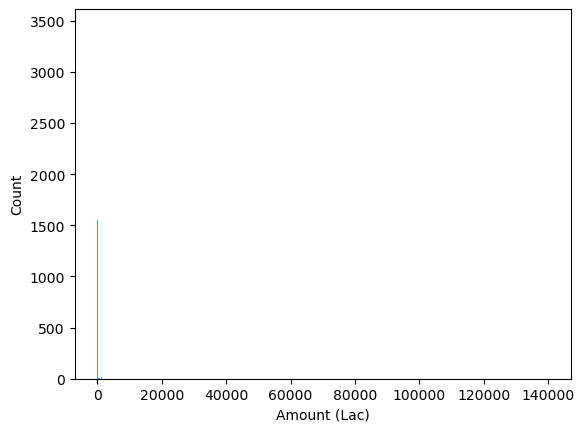

In [789]:
sns.histplot(df['Amount (Lac)'])

<Axes: >

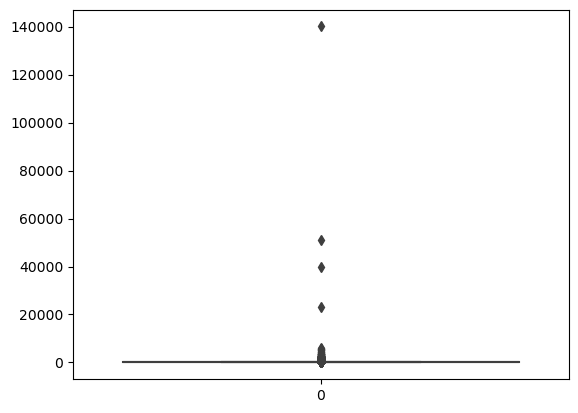

In [790]:
sns.boxplot(df['Amount (Lac)'])

In [791]:
#df[df['Amount (Lac)']>=20000]# 4 rows
more_20000 = df[df['Amount (Lac)']>=20000].index
df.drop(more_20000 , inplace=True)
df.reset_index(drop=True,inplace=True)
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
66680             3225.0  zirakpur  Ready to Move  New Property   
66681             3274.0  zirakpur  Ready to Move        Resale   
66682             4343.0  zirakpur  Ready to Move        Resale   
66683             4231.0  zirakpur  Ready to Move        Resale   
66684             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
66680  Semi-Furnished          East             Garden/Park       3.0   
66681     Unfurnished  North - East  Main Road, Garden/Park       3.0   
66682       Furnished          East  Main Road, Garden/Park       3.0   
66683  Semi-Furnished           NaN               Main Road       2.0   
66684  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
66680      3.0              Freehold    3          63.0            1953.0   
66681      NaN                   NaN    3          55.0            1680.0   
66682      2.0              Freehold    3          76.0            1250.0   
66683      NaN                   NaN    2          30.0             709.0   
66684      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type  
0          10.0         11.0             NaN              NaN  
1           3.0         22.0             1.0             Open  
2          10.0         29.0             1.0          Covered  
3           1.0          3.0             NaN              NaN  
4          20.0         42.0             1.0          Covered  
...         ...          ...             ...              ...  
66680       2.0          4.0             1.0          Covered  
66681       4.0          6.0             1.0          Covered  
66682       1.0          3.0             1.0          Covered  
66683       2.0          2.0             NaN              NaN  
66684       5.0         13.0             1.0          Covered  

[66685 rows x 17 columns]

<Axes: xlabel='Amount (Lac)', ylabel='Count'>

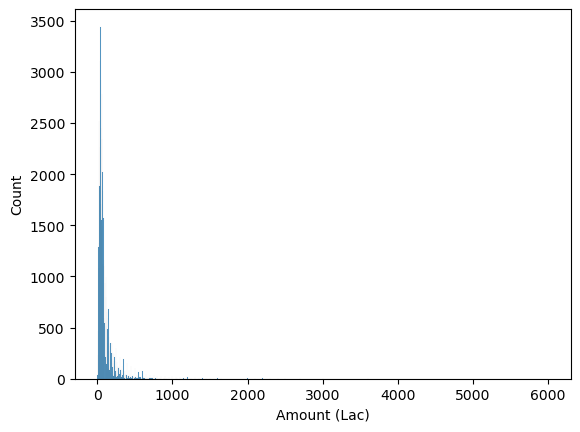

In [792]:
sns.histplot(df['Amount (Lac)'])

<Axes: xlabel='Carpet Area Sqft', ylabel='Count'>

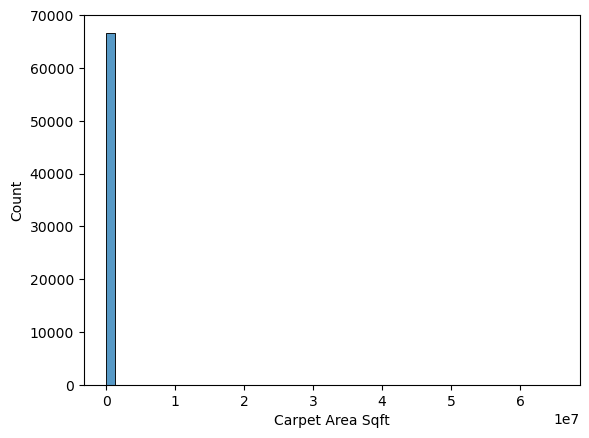

In [793]:
sns.histplot(df['Carpet Area Sqft'],bins=50)

<Axes: >

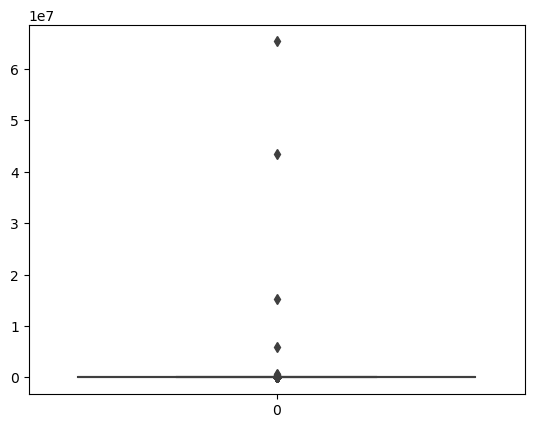

In [794]:
sns.boxplot(df['Carpet Area Sqft'])

In [795]:
df[df['Carpet Area Sqft']>=10000000]# 3 rows

more_10000000 = df[df['Carpet Area Sqft']>=10000000].index
df.drop(more_10000000 , inplace=True)
df.reset_index(drop=True,inplace=True)
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
66677             3225.0  zirakpur  Ready to Move  New Property   
66678             3274.0  zirakpur  Ready to Move        Resale   
66679             4343.0  zirakpur  Ready to Move        Resale   
66680             4231.0  zirakpur  Ready to Move        Resale   
66681             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
66677  Semi-Furnished          East             Garden/Park       3.0   
66678     Unfurnished  North - East  Main Road, Garden/Park       3.0   
66679       Furnished          East  Main Road, Garden/Park       3.0   
66680  Semi-Furnished           NaN               Main Road       2.0   
66681  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
66677      3.0              Freehold    3          63.0            1953.0   
66678      NaN                   NaN    3          55.0            1680.0   
66679      2.0              Freehold    3          76.0            1250.0   
66680      NaN                   NaN    2          30.0             709.0   
66681      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type  
0          10.0         11.0             NaN              NaN  
1           3.0         22.0             1.0             Open  
2          10.0         29.0             1.0          Covered  
3           1.0          3.0             NaN              NaN  
4          20.0         42.0             1.0          Covered  
...         ...          ...             ...              ...  
66677       2.0          4.0             1.0          Covered  
66678       4.0          6.0             1.0          Covered  
66679       1.0          3.0             1.0          Covered  
66680       2.0          2.0             NaN              NaN  
66681       5.0         13.0             1.0          Covered  

[66682 rows x 17 columns]

<Axes: >

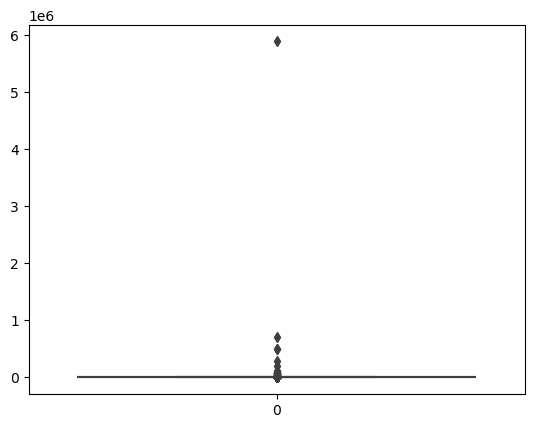

In [796]:
sns.boxplot(df['Carpet Area Sqft'])

In [797]:
# try to fill nans of Amount (Lac)
df[df['Amount (Lac)'].isnull()][['Carpet Area Sqft','Amount (Lac)','Price (in rupees)']]

Carpet Area Sqft  Amount (Lac)  Price (in rupees)
24                525.0           NaN                NaN
37                550.0           NaN                NaN
82                550.0           NaN                NaN
130               850.0           NaN                NaN
176               758.0           NaN                NaN
...                 ...           ...                ...
66564            1450.0           NaN                NaN
66596            1200.0           NaN                NaN
66654             990.0           NaN                NaN
66657            2500.0           NaN                NaN
66664            1200.0           NaN                NaN

[2829 rows x 3 columns]

In [798]:
# we have to drop 2829 on nan values in Amount (Lac)
df.dropna(subset=["Amount (Lac)"], inplace=True) 
df.reset_index(drop=True,inplace=True)
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
63848             3225.0  zirakpur  Ready to Move  New Property   
63849             3274.0  zirakpur  Ready to Move        Resale   
63850             4343.0  zirakpur  Ready to Move        Resale   
63851             4231.0  zirakpur  Ready to Move        Resale   
63852             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
63848  Semi-Furnished          East             Garden/Park       3.0   
63849     Unfurnished  North - East  Main Road, Garden/Park       3.0   
63850       Furnished          East  Main Road, Garden/Park       3.0   
63851  Semi-Furnished           NaN               Main Road       2.0   
63852  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
63848      3.0              Freehold    3          63.0            1953.0   
63849      NaN                   NaN    3          55.0            1680.0   
63850      2.0              Freehold    3          76.0            1250.0   
63851      NaN                   NaN    2          30.0             709.0   
63852      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type  
0          10.0         11.0             NaN              NaN  
1           3.0         22.0             1.0             Open  
2          10.0         29.0             1.0          Covered  
3           1.0          3.0             NaN              NaN  
4          20.0         42.0             1.0          Covered  
...         ...          ...             ...              ...  
63848       2.0          4.0             1.0          Covered  
63849       4.0          6.0             1.0          Covered  
63850       1.0          3.0             1.0          Covered  
63851       2.0          2.0             NaN              NaN  
63852       5.0         13.0             1.0          Covered  

[63853 rows x 17 columns]

In [799]:
df.describe()

Price (in rupees)      Bathroom       Balcony           BHK  \
count       6.101100e+04  63475.000000  46350.000000  63853.000000   
mean        6.423068e+03      2.417377      2.087422      2.549371   
std         1.887755e+04      0.891076      1.016252      0.942047   
min         1.000000e+00      1.000000      1.000000      0.000000   
25%         3.833000e+03      2.000000      1.000000      2.000000   
50%         5.070000e+03      2.000000      2.000000      3.000000   
75%         7.107000e+03      3.000000      3.000000      3.000000   
max         4.500000e+06     11.000000     11.000000     49.000000   

       Amount (Lac)  Carpet Area Sqft      floor_no   floor_total  \
count  63853.000000      6.385300e+04  61454.000000  61413.000000   
mean     102.885174      1.458744e+03      4.353598      8.610034   
std      153.173887      2.367872e+04      4.462112      6.983779   
min        1.000000      1.000000e+02     -2.000000      1.000000   
25%       41.000000      8.600000e+02      2.000000      4.000000   
50%       65.000000      1.150000e+03      3.000000      5.000000   
75%      109.000000      1.550000e+03      5.000000     12.000000   
max     6000.000000      5.880600e+06    200.000000    200.000000   

       car_parking_no  
count    27195.000000  
mean         3.916896  
std         33.416741  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max        999.000000

# clustering and anmaly detection

In [801]:
df_factors2 = df[['Carpet Area Sqft','Bathroom','Balcony','BHK']]
df_factors2

Carpet Area Sqft  Bathroom  Balcony  BHK
0                 500.0       1.0      2.0    1
1                 473.0       2.0      NaN    2
2                 779.0       2.0      NaN    2
3                 530.0       1.0      1.0    1
4                 635.0       2.0      NaN    2
...                 ...       ...      ...  ...
63848            1953.0       3.0      3.0    3
63849            1680.0       3.0      NaN    3
63850            1250.0       3.0      2.0    3
63851             709.0       2.0      NaN    2
63852            1915.0       4.0      4.0    3

[63853 rows x 4 columns]

In [802]:
# clustering based on 4 factors: Bathroom ,BHK,	Balcony	,Carpet Area Sqft	
#pipeline
# cat1: Bathroom, Balcony, BHK, floor_no, floor_total ,car_parking_no => categorical encoded data
# cat2: car_parking_type ,Ownership,Furnishing,Transaction,Status => OHE
# cat3:location , overlooking,facing => BE
# num1: Price (in rupees),Carpet Area Sqft=> right-skewed / outliers / 

# target: Amount (Lac) => right-skewed / outliers

cat_1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])

num1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    #('handle_outliers', LogTransfomer()),
    ('scale', RobustScaler())
])




preprocessor_cluster = ColumnTransformer(transformers=[
    ("cat_no_change", cat_1_pipeline, ['Bathroom', 'Balcony','BHK']),
    # ("unnamed", unnamed_pipeline, ['Unnamed: 0']),
    # ("cat_pipe", cat_2_pipeline, ['car_parking_type' ,'Ownership','Furnishing','Transaction','Status']),
    # ("cat3_pipe", cat_3_pipeline, ['location' , 'overlooking','facing']),
    ("num_pipeline", num1_pipeline, ['Carpet Area Sqft']),
    
])

preprocessor_cluster

ColumnTransformer(transformers=[('cat_no_change',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Bathroom', 'Balcony', 'BHK']),
                                ('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 ['Carpet Area Sqft'])])

In [803]:
df_factors2_preprocessed = preprocessor_cluster.fit_transform(df_factors2)
df_factors2_preprocessed

array([[ 1.        ,  2.        ,  1.        , -0.94202899],
       [ 2.        ,  2.        ,  2.        , -0.98115942],
       [ 2.        ,  2.        ,  2.        , -0.53768116],
       ...,
       [ 3.        ,  2.        ,  3.        ,  0.14492754],
       [ 2.        ,  2.        ,  2.        , -0.63913043],
       [ 4.        ,  4.        ,  3.        ,  1.10869565]])

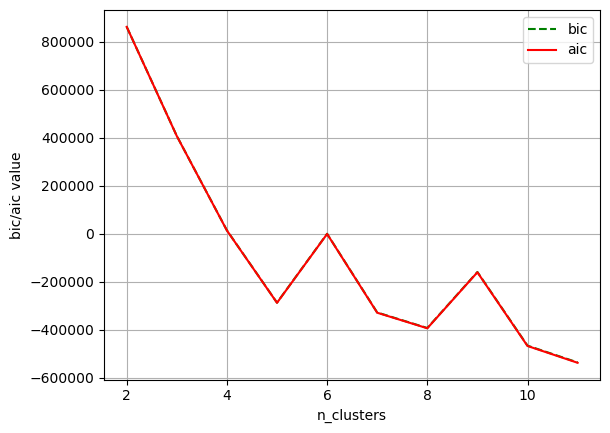

5

In [ ]:
bics = []
aics = []
n_components = range(2, 12)
for i in n_components:
    gm = GaussianMixture(n_components=i, max_iter=100, n_init=10,random_state=42)
    gm.fit(df_factors2_preprocessed)
    bics.append(gm.bic(df_factors2_preprocessed))
    aics.append(gm.aic(df_factors2_preprocessed))
plt.plot(n_components, bics, 'g--', label='bic')
plt.plot(n_components, aics, 'r', label='aic')
plt.legend()
plt.xlabel("n_clusters")
plt.ylabel("bic/aic value")
plt.grid()
plt.show()
knee_point = KneeLocator(n_components, aics, curve='convex', direction='decreasing')
knee_point.knee

In [804]:
gm = GaussianMixture(n_components=5, max_iter=100, n_init=10, random_state=42)
gm.fit(df_factors2_preprocessed)

GaussianMixture(n_components=5, n_init=10, random_state=42)

In [805]:
densities = gm.score_samples(df_factors2_preprocessed)
density_threshold_gm = np.percentile(densities,3) # let's say we have 3% outliers customers
anomalies = densities[densities < density_threshold_gm]

df['gm_clusters'] = gm.predict(df_factors2_preprocessed)
df['gm_clusters'][densities < density_threshold_gm] = -1
df.describe()

C:\Users\User\AppData\Local\Temp\ipykernel_16608\3355217854.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Price (in rupees)      Bathroom       Balcony           BHK  \
count       6.101100e+04  63475.000000  46350.000000  63853.000000   
mean        6.423068e+03      2.417377      2.087422      2.549371   
std         1.887755e+04      0.891076      1.016252      0.942047   
min         1.000000e+00      1.000000      1.000000      0.000000   
25%         3.833000e+03      2.000000      1.000000      2.000000   
50%         5.070000e+03      2.000000      2.000000      3.000000   
75%         7.107000e+03      3.000000      3.000000      3.000000   
max         4.500000e+06     11.000000     11.000000     49.000000   

       Amount (Lac)  Carpet Area Sqft      floor_no   floor_total  \
count  63853.000000      6.385300e+04  61454.000000  61413.000000   
mean     102.885174      1.458744e+03      4.353598      8.610034   
std      153.173887      2.367872e+04      4.462112      6.983779   
min        1.000000      1.000000e+02     -2.000000      1.000000   
25%       41.000000      8.600000e+02      2.000000      4.000000   
50%       65.000000      1.150000e+03      3.000000      5.000000   
75%      109.000000      1.550000e+03      5.000000     12.000000   
max     6000.000000      5.880600e+06    200.000000    200.000000   

       car_parking_no   gm_clusters  
count    27195.000000  63853.000000  
mean         3.916896      3.082063  
std         33.416741      1.060664  
min          1.000000     -1.000000  
25%          1.000000      3.000000  
50%          1.000000      3.000000  
75%          1.000000      4.000000  
max        999.000000      4.000000

In [806]:
df['gm_clusters'].value_counts()

gm_clusters
 4    26922
 3    21220
 2    13683
-1     1916
 0      111
 1        1
Name: count, dtype: int64

In [807]:
df.groupby('gm_clusters')[['Carpet Area Sqft','Bathroom','Balcony','BHK','Amount (Lac)']].mean().reset_index().sort_values(by='Carpet Area Sqft', ascending=False)

gm_clusters  Carpet Area Sqft  Bathroom   Balcony       BHK  Amount (Lac)
2            1      5.880600e+06  2.000000  2.000000  2.000000     30.000000
0           -1      5.853647e+03  4.320533  3.167247  4.296451    485.200939
1            0      3.054514e+03  4.342342  2.708333  4.162162    341.513514
5            4      1.462491e+03  2.711418  2.249418  3.000000    109.407399
4            3      1.080324e+03  2.133050  1.829356  2.165740     88.013054
3            2      9.802144e+02  2.000000  2.000000  2.000000     57.651173

In [808]:
df[df['gm_clusters']==-1].describe()

Price (in rupees)     Bathroom      Balcony          BHK  Amount (Lac)  \
count       1.857000e+03  1875.000000  1435.000000  1916.000000   1916.000000   
mean        1.364050e+04     4.320533     3.167247     4.296451    485.200939   
std         1.047009e+05     1.572231     1.894693     2.603033    566.689498   
min         7.000000e+00     1.000000     1.000000     0.000000      2.000000   
25%         5.729000e+03     4.000000     2.000000     4.000000    180.000000   
50%         8.758000e+03     4.000000     3.000000     4.000000    344.000000   
75%         1.333300e+04     5.000000     4.000000     4.000000    570.750000   
max         4.500000e+06    11.000000    11.000000    49.000000   6000.000000   

       Carpet Area Sqft     floor_no  floor_total  car_parking_no  gm_clusters  
count       1916.000000  1846.000000  1841.000000     1007.000000       1916.0  
mean        5853.646973     6.235645    11.423683        2.842105         -1.0  
std        24799.415504     6.828066     9.735232       14.965895          0.0  
min          110.000000    -2.000000     1.000000        1.000000         -1.0  
25%         3151.000000     2.000000     4.000000        1.000000         -1.0  
50%         3800.000000     4.000000     9.000000        2.000000         -1.0  
75%         4518.000000     9.000000    15.000000        3.000000         -1.0  
max       709222.000000    75.000000    91.000000      401.000000         -1.0

In [809]:
# drop cluster 1 and cluster -1
cluster_out = df[(df['gm_clusters']==1) | (df['gm_clusters']==-1)].index

df.drop(cluster_out , inplace=True)
df.reset_index(drop=True,inplace=True)
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
61931             3225.0  zirakpur  Ready to Move  New Property   
61932             3274.0  zirakpur  Ready to Move        Resale   
61933             4343.0  zirakpur  Ready to Move        Resale   
61934             4231.0  zirakpur  Ready to Move        Resale   
61935             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
61931  Semi-Furnished          East             Garden/Park       3.0   
61932     Unfurnished  North - East  Main Road, Garden/Park       3.0   
61933       Furnished          East  Main Road, Garden/Park       3.0   
61934  Semi-Furnished           NaN               Main Road       2.0   
61935  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
61931      3.0              Freehold    3          63.0            1953.0   
61932      NaN                   NaN    3          55.0            1680.0   
61933      2.0              Freehold    3          76.0            1250.0   
61934      NaN                   NaN    2          30.0             709.0   
61935      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type  gm_clusters  
0          10.0         11.0             NaN              NaN            3  
1           3.0         22.0             1.0             Open            2  
2          10.0         29.0             1.0          Covered            2  
3           1.0          3.0             NaN              NaN            3  
4          20.0         42.0             1.0          Covered            2  
...         ...          ...             ...              ...          ...  
61931       2.0          4.0             1.0          Covered            4  
61932       4.0          6.0             1.0          Covered            4  
61933       1.0          3.0             1.0          Covered            4  
61934       2.0          2.0             NaN              NaN            2  
61935       5.0         13.0             1.0          Covered            4  

[61936 rows x 18 columns]

In [810]:
df['gm_clusters'].value_counts()

gm_clusters
4    26922
3    21220
2    13683
0      111
Name: count, dtype: int64

In [811]:
df[df['gm_clusters']==4].describe()

Price (in rupees)      Bathroom       Balcony      BHK  Amount (Lac)  \
count       25976.000000  26800.000000  21041.000000  26922.0  26922.000000   
mean         6495.705536      2.711418      2.249418      3.0    109.407399   
std          4519.810511      0.554776      0.953008      0.0     88.406129   
min            48.000000      1.000000      1.000000      3.0      1.000000   
25%          4054.750000      2.000000      2.000000      3.0     60.000000   
50%          5293.500000      3.000000      2.000000      3.0     82.000000   
75%          7372.250000      3.000000      3.000000      3.0    127.000000   
max        133929.000000      5.000000      6.000000      3.0   1600.000000   

       Carpet Area Sqft      floor_no   floor_total  car_parking_no  \
count      26922.000000  25847.000000  25834.000000    13443.000000   
mean        1462.491223      4.552443      9.122165        3.284088   
std          419.323952      4.454794      7.073932       30.366945   
min          100.000000     -2.000000      1.000000        1.000000   
25%         1186.000000      2.000000      4.000000        1.000000   
50%         1400.000000      3.000000      6.000000        1.000000   
75%         1697.000000      6.000000     13.000000        1.000000   
max         3800.000000     51.000000     91.000000      999.000000   

       gm_clusters  
count      26922.0  
mean           4.0  
std            0.0  
min            4.0  
25%            4.0  
50%            4.0  
75%            4.0  
max            4.0

In [812]:
df[df['gm_clusters']==3].describe()

Price (in rupees)      Bathroom       Balcony           BHK  \
count       19961.000000  21165.000000  17223.000000  21220.000000   
mean         6264.607585      2.133050      1.829356      2.165740   
std          5244.652629      1.062481      1.080477      1.081314   
min             1.000000      1.000000      1.000000      0.000000   
25%          3684.000000      1.000000      1.000000      1.000000   
50%          5000.000000      2.000000      1.000000      2.000000   
75%          7100.000000      2.000000      3.000000      2.000000   
max        322727.000000      6.000000      6.000000      6.000000   

       Amount (Lac)  Carpet Area Sqft      floor_no   floor_total  \
count  21220.000000      21220.000000  20816.000000  20801.000000   
mean      88.013054       1080.323926      4.202104      8.203019   
std      123.007696        673.819006      4.308903      6.822297   
min        1.000000        100.000000     -2.000000      1.000000   
25%       29.000000        614.000000      1.000000      4.000000   
50%       47.000000        856.000000      3.000000      5.000000   
75%       87.000000       1250.000000      5.000000     12.000000   
max     2700.000000       3625.000000     59.000000    150.000000   

       car_parking_no  gm_clusters  
count     8491.000000      21220.0  
mean         4.054057          3.0  
std         33.270325          0.0  
min          1.000000          3.0  
25%          1.000000          3.0  
50%          1.000000          3.0  
75%          1.000000          3.0  
max        908.000000          3.0

In [813]:
df[df['gm_clusters']==2].describe()

Price (in rupees)  Bathroom  Balcony      BHK  Amount (Lac)  \
count       13107.000000   13523.0   6554.0  13683.0  13683.000000   
mean         5470.810712       2.0      2.0      2.0     57.651173   
std          3918.832487       0.0      0.0      0.0     40.450896   
min            86.000000       2.0      2.0      2.0      1.000000   
25%          3554.500000       2.0      2.0      2.0     35.000000   
50%          4596.000000       2.0      2.0      2.0     48.000000   
75%          6086.500000       2.0      2.0      2.0     65.000000   
max         68000.000000       2.0      2.0      2.0    800.000000   

       Carpet Area Sqft      floor_no   floor_total  car_parking_no  \
count      13683.000000  12839.000000  12831.000000     4182.000000   
mean         980.214441      3.923047      7.830099        5.966523   
std          228.588023      4.182322      6.374697       44.618941   
min          100.000000     -2.000000      1.000000        1.000000   
25%          820.000000      2.000000      4.000000        1.000000   
50%          976.000000      3.000000      5.000000        1.000000   
75%         1130.000000      5.000000     11.000000        1.000000   
max         2500.000000    200.000000    200.000000      835.000000   

       gm_clusters  
count      13683.0  
mean           2.0  
std            0.0  
min            2.0  
25%            2.0  
50%            2.0  
75%            2.0  
max            2.0

In [814]:
df[df['gm_clusters']==0].describe()

Price (in rupees)    Bathroom    Balcony         BHK  Amount (Lac)  \
count         109.000000  111.000000  96.000000  111.000000    111.000000   
mean         9735.743119    4.342342   2.708333    4.162162    341.513514   
std          6235.402422    0.610447   0.694591    0.458070    287.057101   
min          1844.000000    3.000000   2.000000    2.000000     38.000000   
25%          6116.000000    4.000000   2.000000    4.000000    205.000000   
50%          8025.000000    4.000000   3.000000    4.000000    270.000000   
75%         10400.000000    5.000000   3.000000    4.000000    352.500000   
max         38889.000000    5.000000   4.000000    6.000000   2100.000000   

       Carpet Area Sqft    floor_no  floor_total  car_parking_no  gm_clusters  
count        111.000000  105.000000   105.000000       72.000000        111.0  
mean        3054.513514    5.019048     9.276190        1.875000          0.0  
std          636.464023    5.480702     7.598703        0.887114          0.0  
min          827.000000   -2.000000     1.000000        1.000000          0.0  
25%         3209.000000    1.000000     4.000000        1.000000          0.0  
50%         3250.000000    3.000000     4.000000        2.000000          0.0  
75%         3300.000000    6.000000    13.000000        2.000000          0.0  
max         3800.000000   26.000000    30.000000        4.000000          0.0

In [815]:
# def get_clust(arg1,arg2): # 17246 only not equal
#     if arg1 == 3 and 100<arg2<=3800 :
#         return 4
    
#     elif arg1 == 2 and 200<arg2<= 900 :
#         return 2
    
#     elif 0<=arg1<=6 and 500<arg2<= 3600  :
#         return 3 
#     elif 4<=arg1<=6 and 2000<arg2<=3800 :
#         return 0
    
#     else:
#         return 2
def get_clust(arg1,arg2): # 10900 only not equal
    if arg1 == 3 and 100<arg2<=3800 :
        return 4
    
    elif arg1 == 2 and 500<arg2<= 3600  :
        return 2
    
    elif 0<=arg1<=6 and 500<arg2<= 3600  :
        return 3 
    elif 4<=arg1<=6 and 2000<arg2<=3800 :
        return 0
    
    else:
        return 3
    
df['clust'] = np.vectorize(get_clust)(df['BHK'], df['Carpet Area Sqft'])

# def get_clust(arg1,arg2): # 15536 only not equal
#     if arg1 == 3 and 100<arg2<=3800 :
#         return 4
    
#     elif arg1==2 and 1000<arg2<= 1200  :
#         return 3 
#     elif arg1 == 2 and 500<arg2<= 2500  :
#         return 2
    
#     elif 0<=arg1<=6 and 500<arg2<= 3600  :
#         return 3 
    
#     elif 4<=arg1<=6 and 2000<arg2<=3800 :
#         return 0
#     else:
#         return 2
    
df['clust'] = np.vectorize(get_clust)(df['BHK'], df['Carpet Area Sqft'])

In [816]:
df['clust'].value_counts()

clust
4    26918
2    24259
3    10749
0       10
Name: count, dtype: int64

In [818]:
df[df['gm_clusters']!=df['clust']][['gm_clusters','clust','Carpet Area Sqft','Bathroom','Balcony','BHK','Amount (Lac)']]

gm_clusters  clust  Carpet Area Sqft  Bathroom  Balcony  BHK  \
1                2      3             473.0       2.0      NaN    2   
15               3      2             675.0       2.0      1.0    2   
36               3      2             639.0       2.0      1.0    2   
37               3      2             600.0       2.0      3.0    2   
43               3      2             620.0       1.0      1.0    2   
...            ...    ...               ...       ...      ...  ...   
61821            3      2            1200.0       2.0      3.0    2   
61842            3      2             800.0       2.0      3.0    2   
61849            3      2             700.0       2.0      3.0    2   
61855            3      2            1000.0       2.0      4.0    2   
61928            0      3            1705.0       5.0      3.0    5   

       Amount (Lac)  
1              98.0  
15             90.0  
36            118.0  
37             35.0  
43            110.0  
...             ...  
61821          46.0  
61842          45.0  
61849          55.0  
61855          54.0  
61928         119.0  

[10964 rows x 7 columns]

In [819]:
df['gm_clusters'].value_counts()

gm_clusters
4    26922
3    21220
2    13683
0      111
Name: count, dtype: int64

In [820]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]


# Create the dictionary
clusters_dictionary = {2: 'economic', 3: 'average', 4:'distinctive' , 0:'luxury'  }

# Add a new column named 'Price'
df['house_clusters'] = df['gm_clusters'].apply(set_value, args=(clusters_dictionary, ))


In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61936 entries, 0 to 61935
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price (in rupees)  59153 non-null  float64
 1   location           61936 non-null  object 
 2   Status             61666 non-null  object 
 3   Transaction        61826 non-null  object 
 4   Furnishing         60858 non-null  object 
 5   facing             37973 non-null  object 
 6   overlooking        35496 non-null  object 
 7   Bathroom           61599 non-null  float64
 8   Balcony            44914 non-null  float64
 9   Ownership          39626 non-null  object 
 10  BHK                61936 non-null  int32  
 11  Amount (Lac)       61936 non-null  float64
 12  Carpet Area Sqft   61936 non-null  float64
 13  floor_no           59607 non-null  float64
 14  floor_total        59571 non-null  float64
 15  car_parking_no     26188 non-null  float64
 16  car_parking_type   261

In [822]:
df.describe()

Price (in rupees)      Bathroom       Balcony           BHK  \
count       59153.000000  61599.000000  44914.000000  61936.000000   
mean         6196.598499      2.359454      2.052923      2.495334   
std          4680.449365      0.793339      0.955366      0.779787   
min             1.000000      1.000000      1.000000      0.000000   
25%          3810.000000      2.000000      1.000000      2.000000   
50%          5000.000000      2.000000      2.000000      3.000000   
75%          6970.000000      3.000000      3.000000      3.000000   
max        322727.000000      6.000000      6.000000      6.000000   

       Amount (Lac)  Carpet Area Sqft      floor_no   floor_total  \
count  61936.000000      61936.000000  59607.000000  59571.000000   
mean      91.059352       1227.864047      4.295351      8.523191   
std       97.966218        543.285727      4.355583      6.863015   
min        1.000000        100.000000     -2.000000      1.000000   
25%       40.000000        850.000000      2.000000      4.000000   
50%       63.000000       1140.000000      3.000000      5.000000   
75%      100.000000       1500.000000      5.000000     12.000000   
max     2700.000000       3800.000000    200.000000    200.000000   

       car_parking_no   gm_clusters         clust  
count    26188.000000  61936.000000  61936.000000  
mean         3.958225      3.208376      3.042447  
std         33.925936      0.792663      0.908820  
min          1.000000      0.000000      0.000000  
25%          1.000000      3.000000      2.000000  
50%          1.000000      3.000000      3.000000  
75%          1.000000      4.000000      4.000000  
max        999.000000      4.000000      4.000000

In [823]:
# drop gm_clusters
df.drop(['gm_clusters','clust'],axis=1,inplace=True)

In [826]:
df.duplicated().sum()

0

In [827]:
df.isnull().sum()

Price (in rupees)     2783
location                 0
Status                 270
Transaction            110
Furnishing            1078
facing               23963
overlooking          26440
Bathroom               337
Balcony              17022
Ownership            22310
BHK                      0
Amount (Lac)             0
Carpet Area Sqft         0
floor_no              2329
floor_total           2365
car_parking_no       35748
car_parking_type     35748
house_clusters           0
dtype: int64

# EDA and Visualization

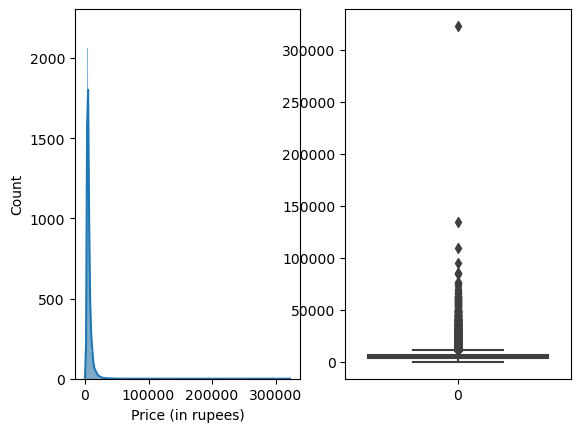

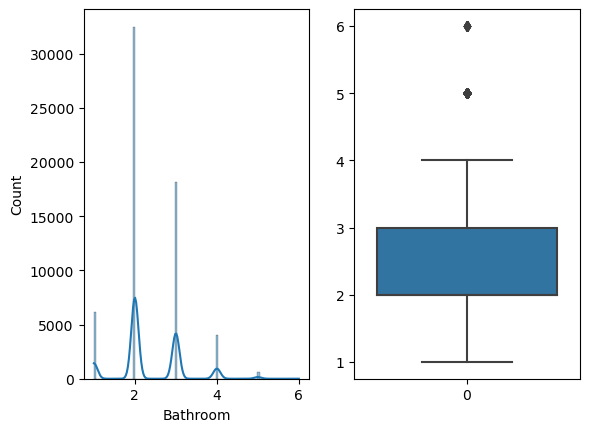

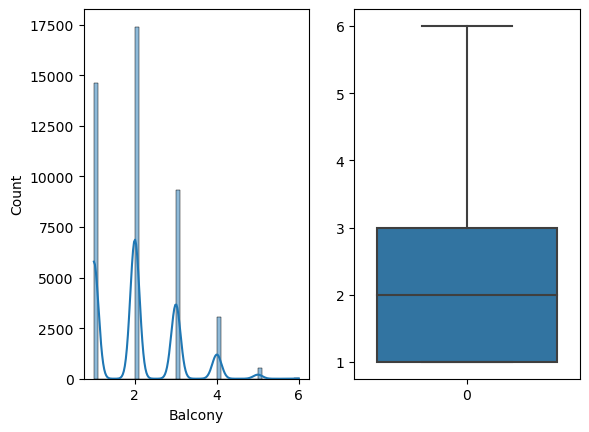

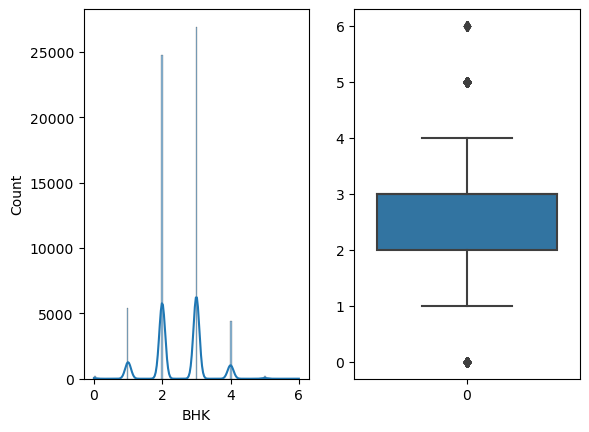

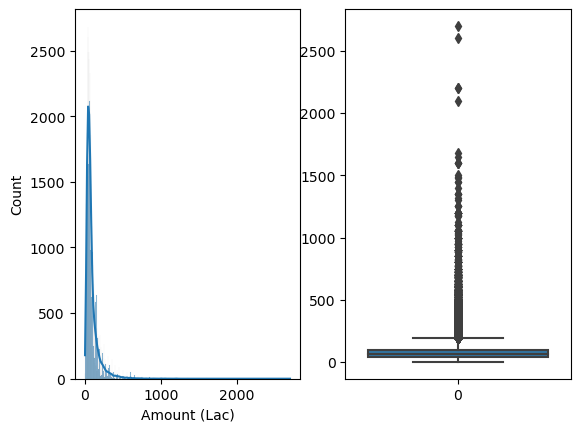

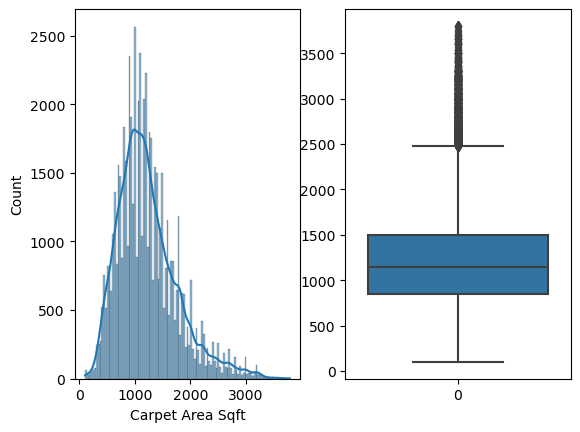

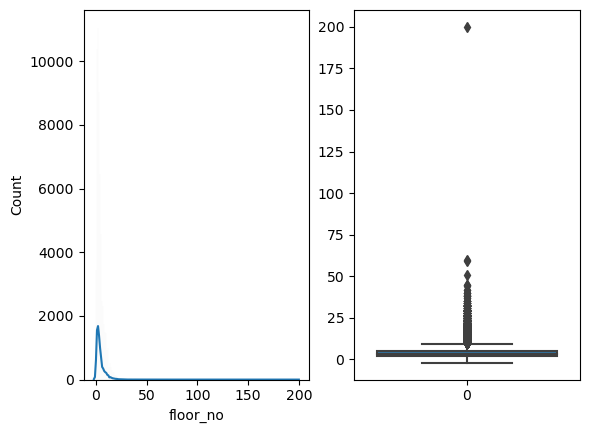

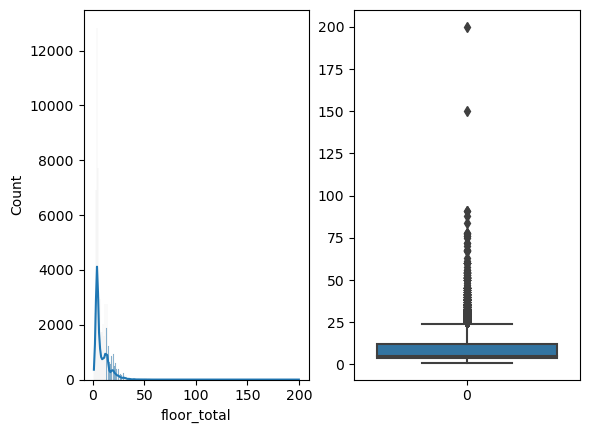

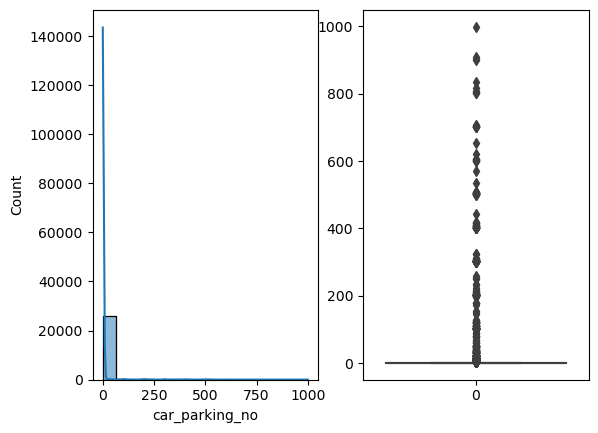

In [828]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])
    plt.show()

location


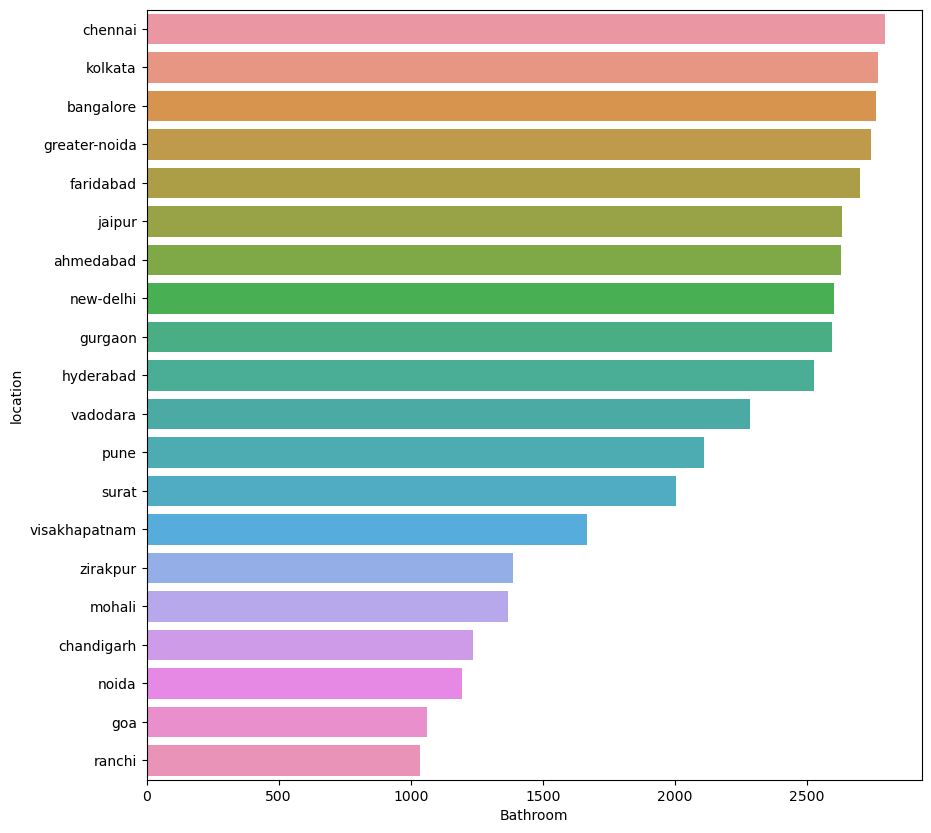

Status


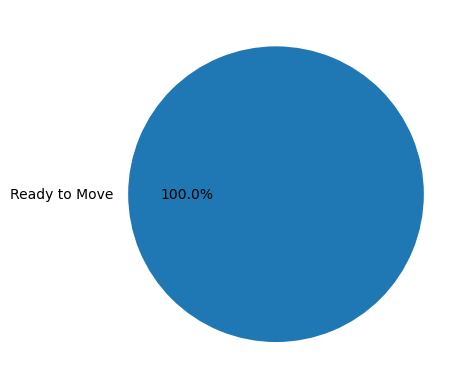

Transaction


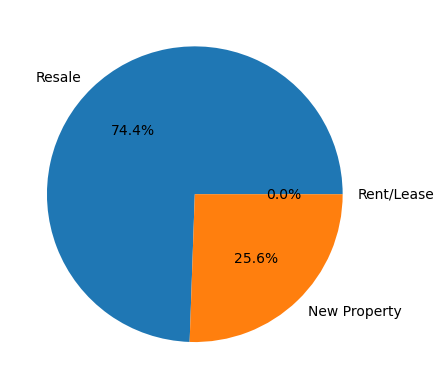

Furnishing


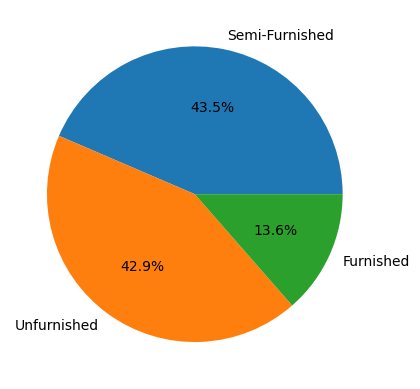

facing


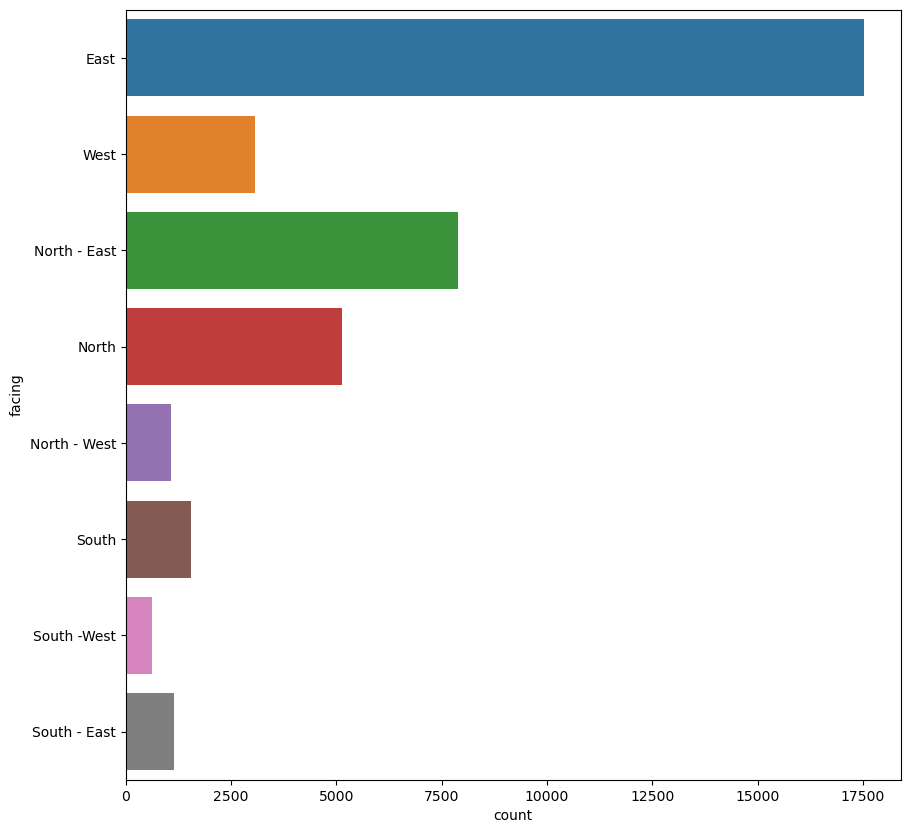

overlooking


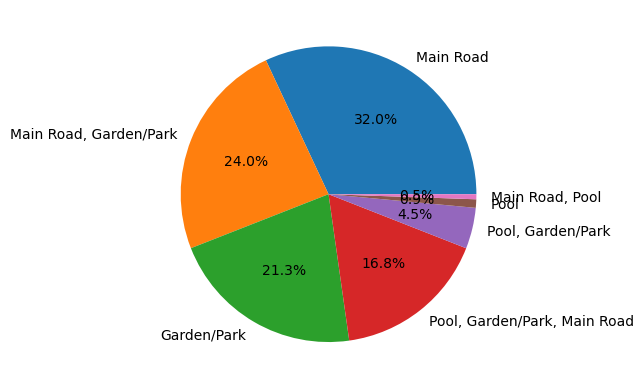

Ownership


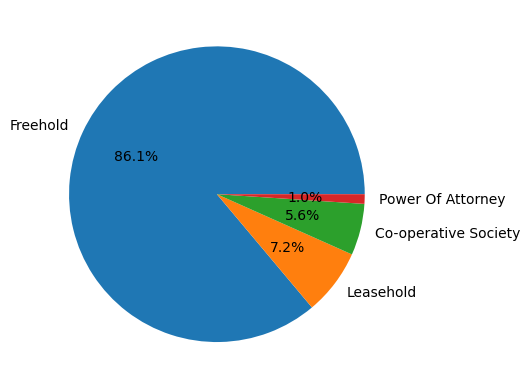

car_parking_type


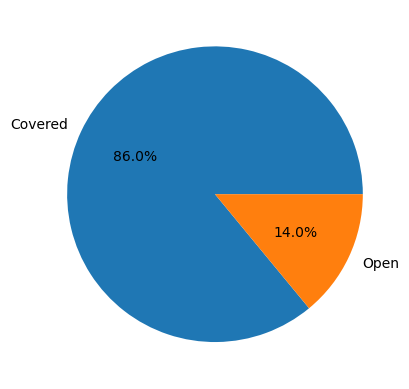

house_clusters


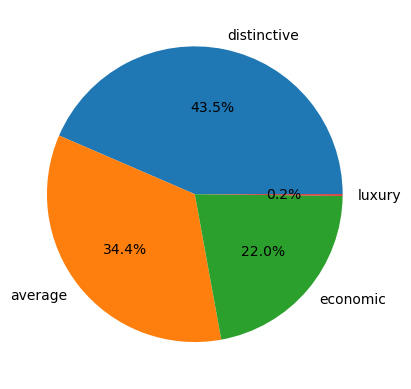

In [829]:
cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(col)
    
    if df[col].nunique() <= 7:
        df_pie = df.groupby(col)[["Bathroom"]].count().sort_values(by='Bathroom', ascending=False)
        plt.pie(labels=df_pie.index, x=df_pie['Bathroom'], autopct="%1.1f%%")
    elif df[col].nunique() > 7 and df[col].nunique() < 35:
        plt.figure(figsize=(10, 10))
        sns.countplot(y=df[col])
    else: # count > 35 show top 20
        plt.figure(figsize=(10, 10))
        df_bar = df.groupby(col)[['Bathroom']].count().reset_index().sort_values(by='Bathroom', ascending=False).head(20)
        sns.barplot(y=df_bar[col], x=df_bar['Bathroom'])
    plt.show()

comments:

==============================
1- Price (in rupees):
distrbution :right skewed
outliers 
****************************************************
2- Amount (Lac):
distrbution :right skewed
outliers 
****************************************************
3- Carpet Area Sqft:
distrbution : right skewed
outliers 
****************************************************
4- Bathroom:
range(1-6) 

****************************************************
5- Balcony:
range(1-6) 
 
****************************************************
6- BHK:
range(0-6) 

****************************************************
7- floor_no:
range(-2:200) 

****************************************************
8- floor_total:
range(1:200) 

****************************************************
9- car_parking_no:
range(1-999) 
***************************************************
10- location:
nuniques: 81
New-delhi most location in data
****************************************************
11- Status:
nuniques : 1
Ready to move most in data
***************************************************
12- Transaction:
nuniques : 3
Resale is the most type in data
***************************************************
13- Furnishing:
nuniques : 3
Unfurnishing is the most type in data
****************************************************
14- facing:
nuniques : 8
East is the most in data
****************************************************
15- overlooking:
nuniques : 7
Main Road is the most in data
******************************************************
16- Ownership:
nuniques : 4
Freehold is the most in data
*****************************************************
17- car_parking_type:
nuniques : 2
Covered is the most in data

18- house_clusters:
uniques:3
destinctive is the most in data

<Axes: >

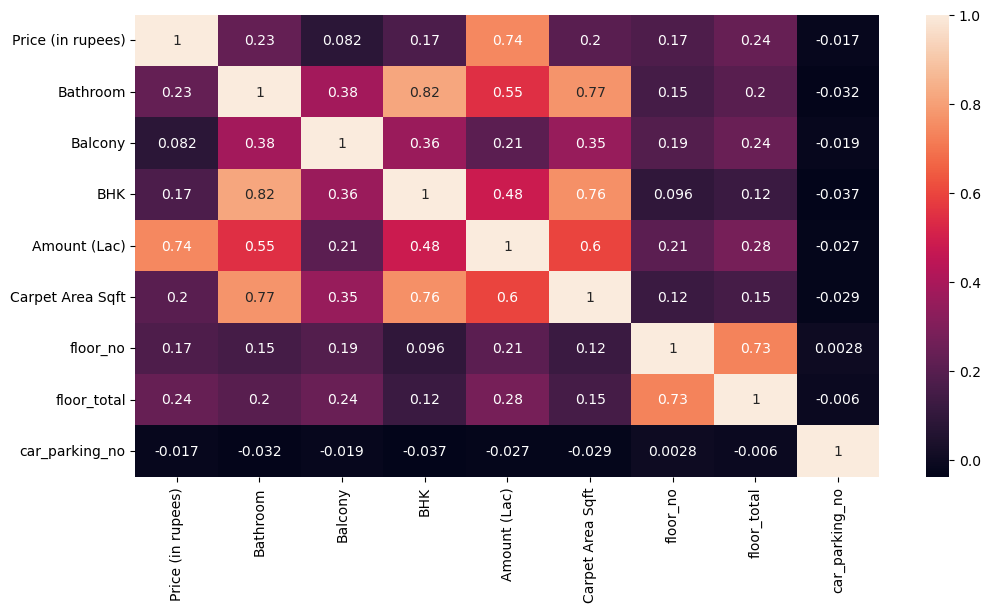

In [830]:
# bi-variate
fig = plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16608\1750386438.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_16608\1750386438.py:9: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



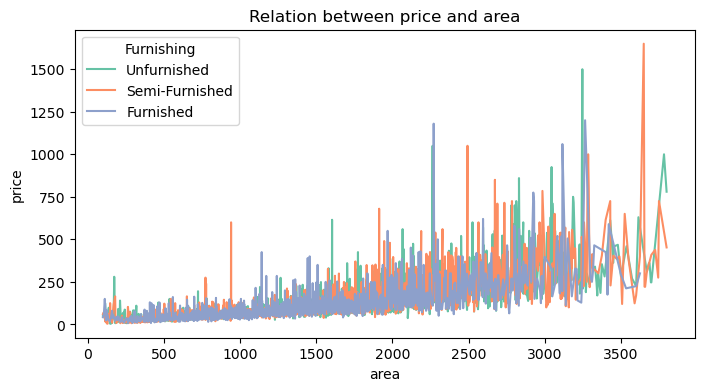

In [859]:
# Question_1: what is the relation between price and area
fig = plt.figure(figsize = (8, 4))
#palette =sns.color_palette("hls", 8)
#palette = sns.color_palette("Paired")#("rocket")#("mako_r", 6)
palette = sns.color_palette("Set2")
plt.title("Relation between price and area")
plt.xlabel("area")
plt.ylabel("price")
sns.lineplot(x=df['Carpet Area Sqft'], y=df['Amount (Lac)'],palette=palette,ci=None,hue=df['Furnishing'])#ci for shadow # palette works with hue only

plt.show()

In [860]:
data1 = px.scatter(df, x = "Carpet Area Sqft", y = "Amount (Lac)",size = "BHK" ,color="house_clusters")
data1['layout'].update(title="Relationship between Sales and Profits using Scatter Plot.",
                    titlefont = dict(size=20),xaxis = dict(title="Sales",titlefont=dict(size=19)),
                    yaxis = dict(title = "Profit", titlefont = dict(size=19)))
#st.plotly_chart(data1,use_container_width=True)
data1.show()

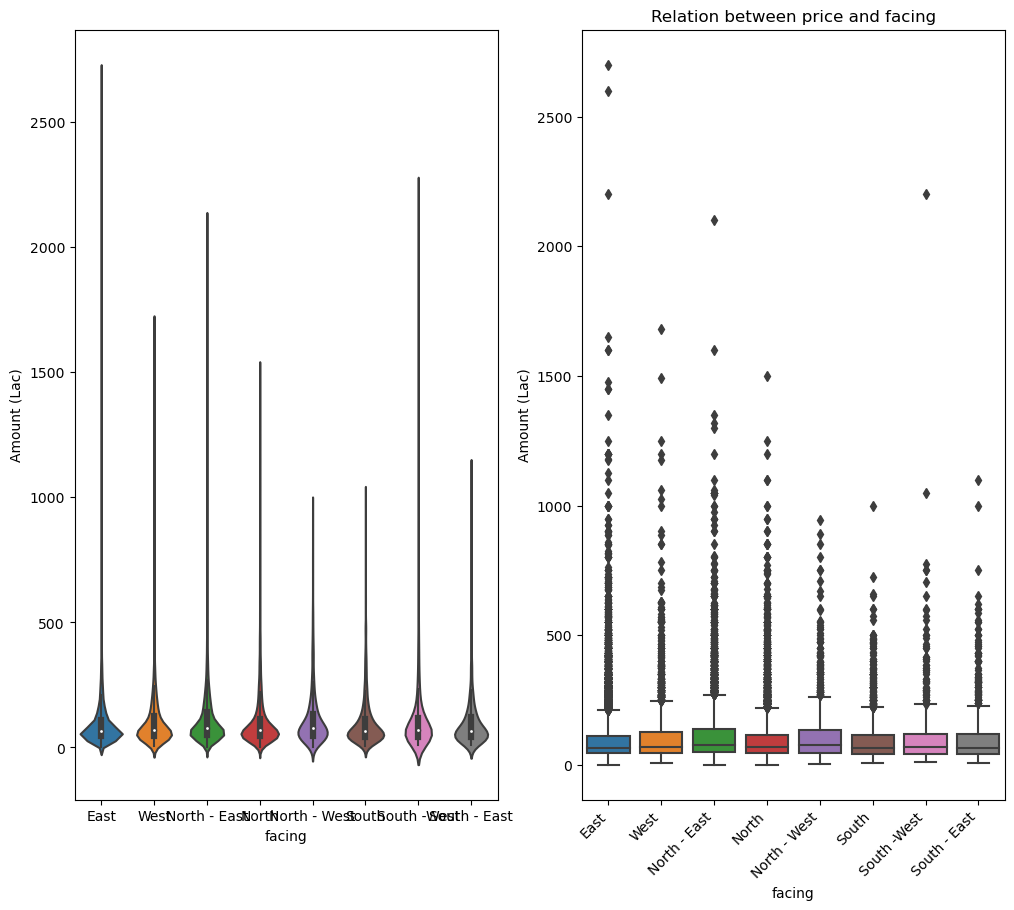

In [861]:
# Question_2: what is the relation between price and facing
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,10))
sns.violinplot(x=df['facing'],y=df['Amount (Lac)'] ,ax=ax1)
sns.boxplot(x=df['facing'],y=df['Amount (Lac)'] ,ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.title("Relation between price and facing")
plt.show()

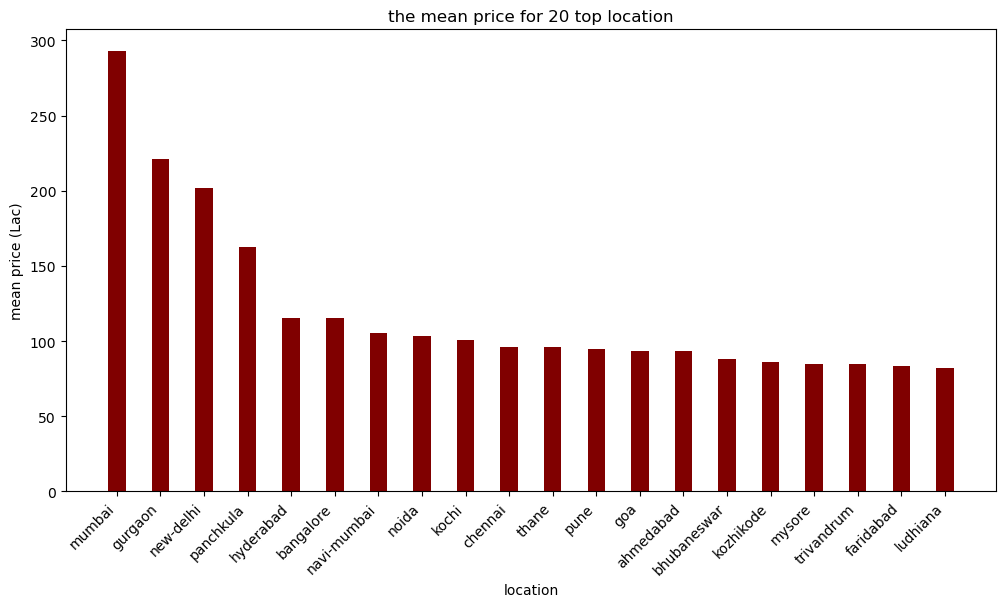

In [862]:
#Q3 : what is the mean price for each location  or the top 10 locations
# check area range , try visualization after handling outliers
graph = df.groupby("location")[['Amount (Lac)']].mean().sort_values(by='Amount (Lac)', ascending=False).rename(columns={'Amount (Lac)':'price'}).reset_index().head(20)
fig = plt.figure(figsize=(12,6))
plt.bar(graph['location'], graph['price'], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.xlabel("location")
plt.ylabel("mean price (Lac)")
plt.title("the mean price for 20 top location")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16608\2004133452.py:9: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



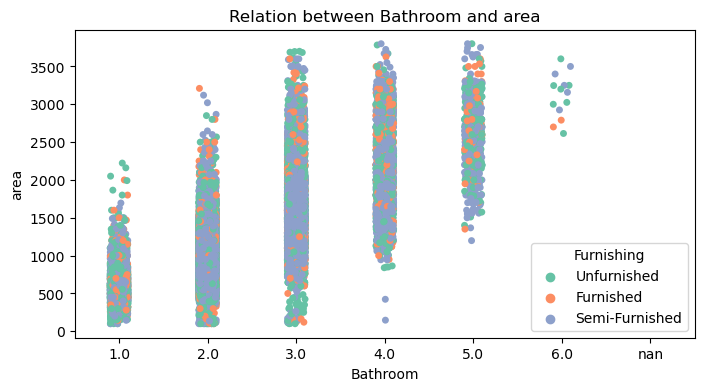

In [863]:
#Q4 :relation between bathroom and area
fig = plt.figure(figsize = (8, 4))
#palette =sns.color_palette("hls", 8)
#palette = sns.color_palette("Paired")#("rocket")#("mako_r", 6)
palette = sns.color_palette("Set2")
plt.title("Relation between Bathroom and area")
plt.xlabel("Bathroom")
plt.ylabel("area")
sns.stripplot(x=df['Bathroom'], y=df['Carpet Area Sqft'],palette=palette,hue=df['Furnishing'])#ci for shadow # palette works with hue only
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_16608\1996575290.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




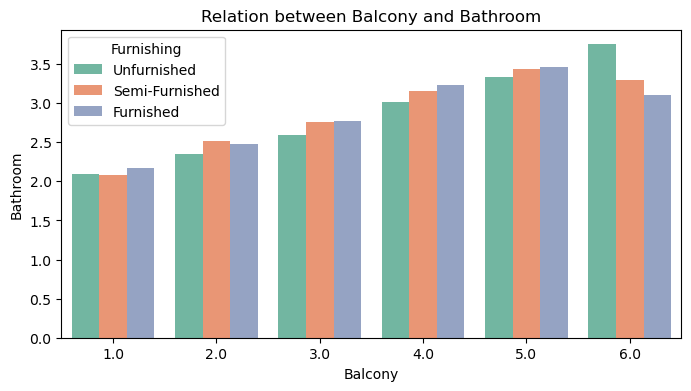

In [864]:
#Q5: bathrooms with balacony
fig = plt.figure(figsize = (8, 4))
#palette =sns.color_palette("hls", 8)
#palette = sns.color_palette("Paired")#("rocket")#("mako_r", 6)
palette = sns.color_palette("Set2")
plt.title("Relation between Balcony and Bathroom")
plt.xlabel("Balcony")
plt.ylabel("Bathroom")
sns.barplot(x=df['Balcony'], y=df['Bathroom'],palette=palette,ci=None,hue=df['Furnishing'])#ci for shadow # palette works with hue only
plt.show()

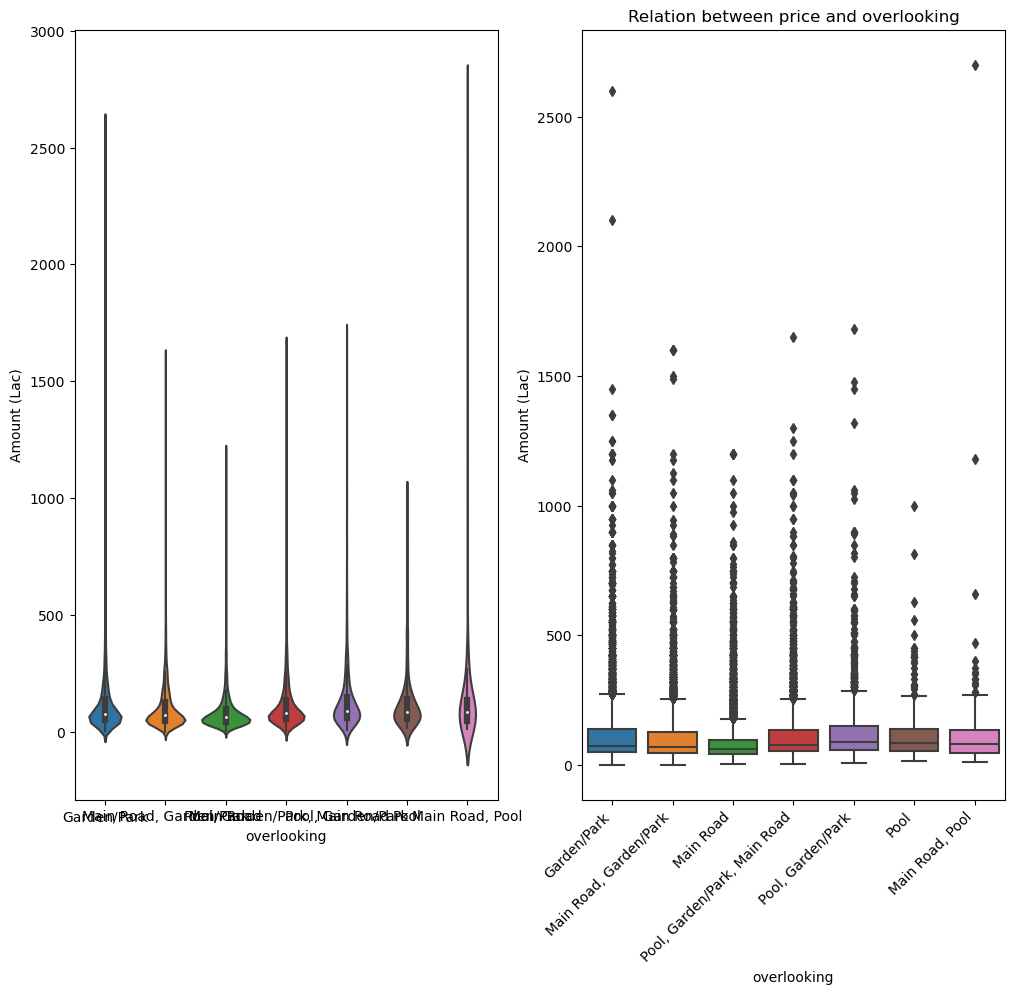

In [865]:
# Question_6: what is the relation between price and overlooking
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,10))
sns.violinplot(x=df['overlooking'],y=df['Amount (Lac)'] ,ax=ax1)
sns.boxplot(x=df['overlooking'],y=df['Amount (Lac)'] ,ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.title("Relation between price and overlooking")
plt.show()

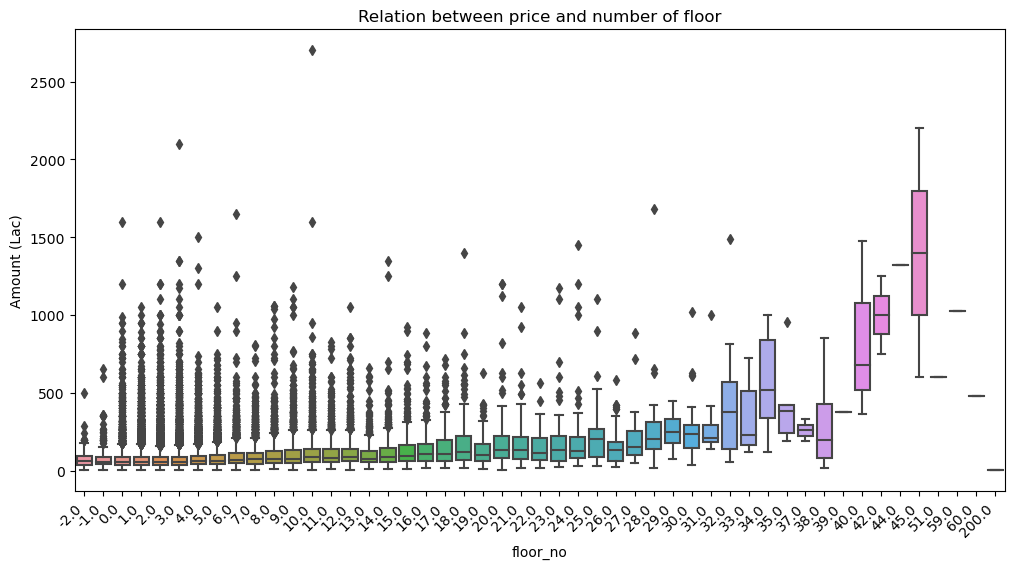

In [869]:
# Question_7: what is the floor number has highest price
fig = plt.figure(figsize = (12, 6))
sns.boxplot(x=df['floor_no'],y=df['Amount (Lac)'] )
plt.xticks(rotation=45, ha='right')
plt.title("Relation between price and number of floor")
plt.show()

In [870]:
df.isnull().sum()

Price (in rupees)     2783
location                 0
Status                 270
Transaction            110
Furnishing            1078
facing               23963
overlooking          26440
Bathroom               337
Balcony              17022
Ownership            22310
BHK                      0
Amount (Lac)             0
Carpet Area Sqft         0
floor_no              2329
floor_total           2365
car_parking_no       35748
car_parking_type     35748
house_clusters           0
dtype: int64

c:\myanaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



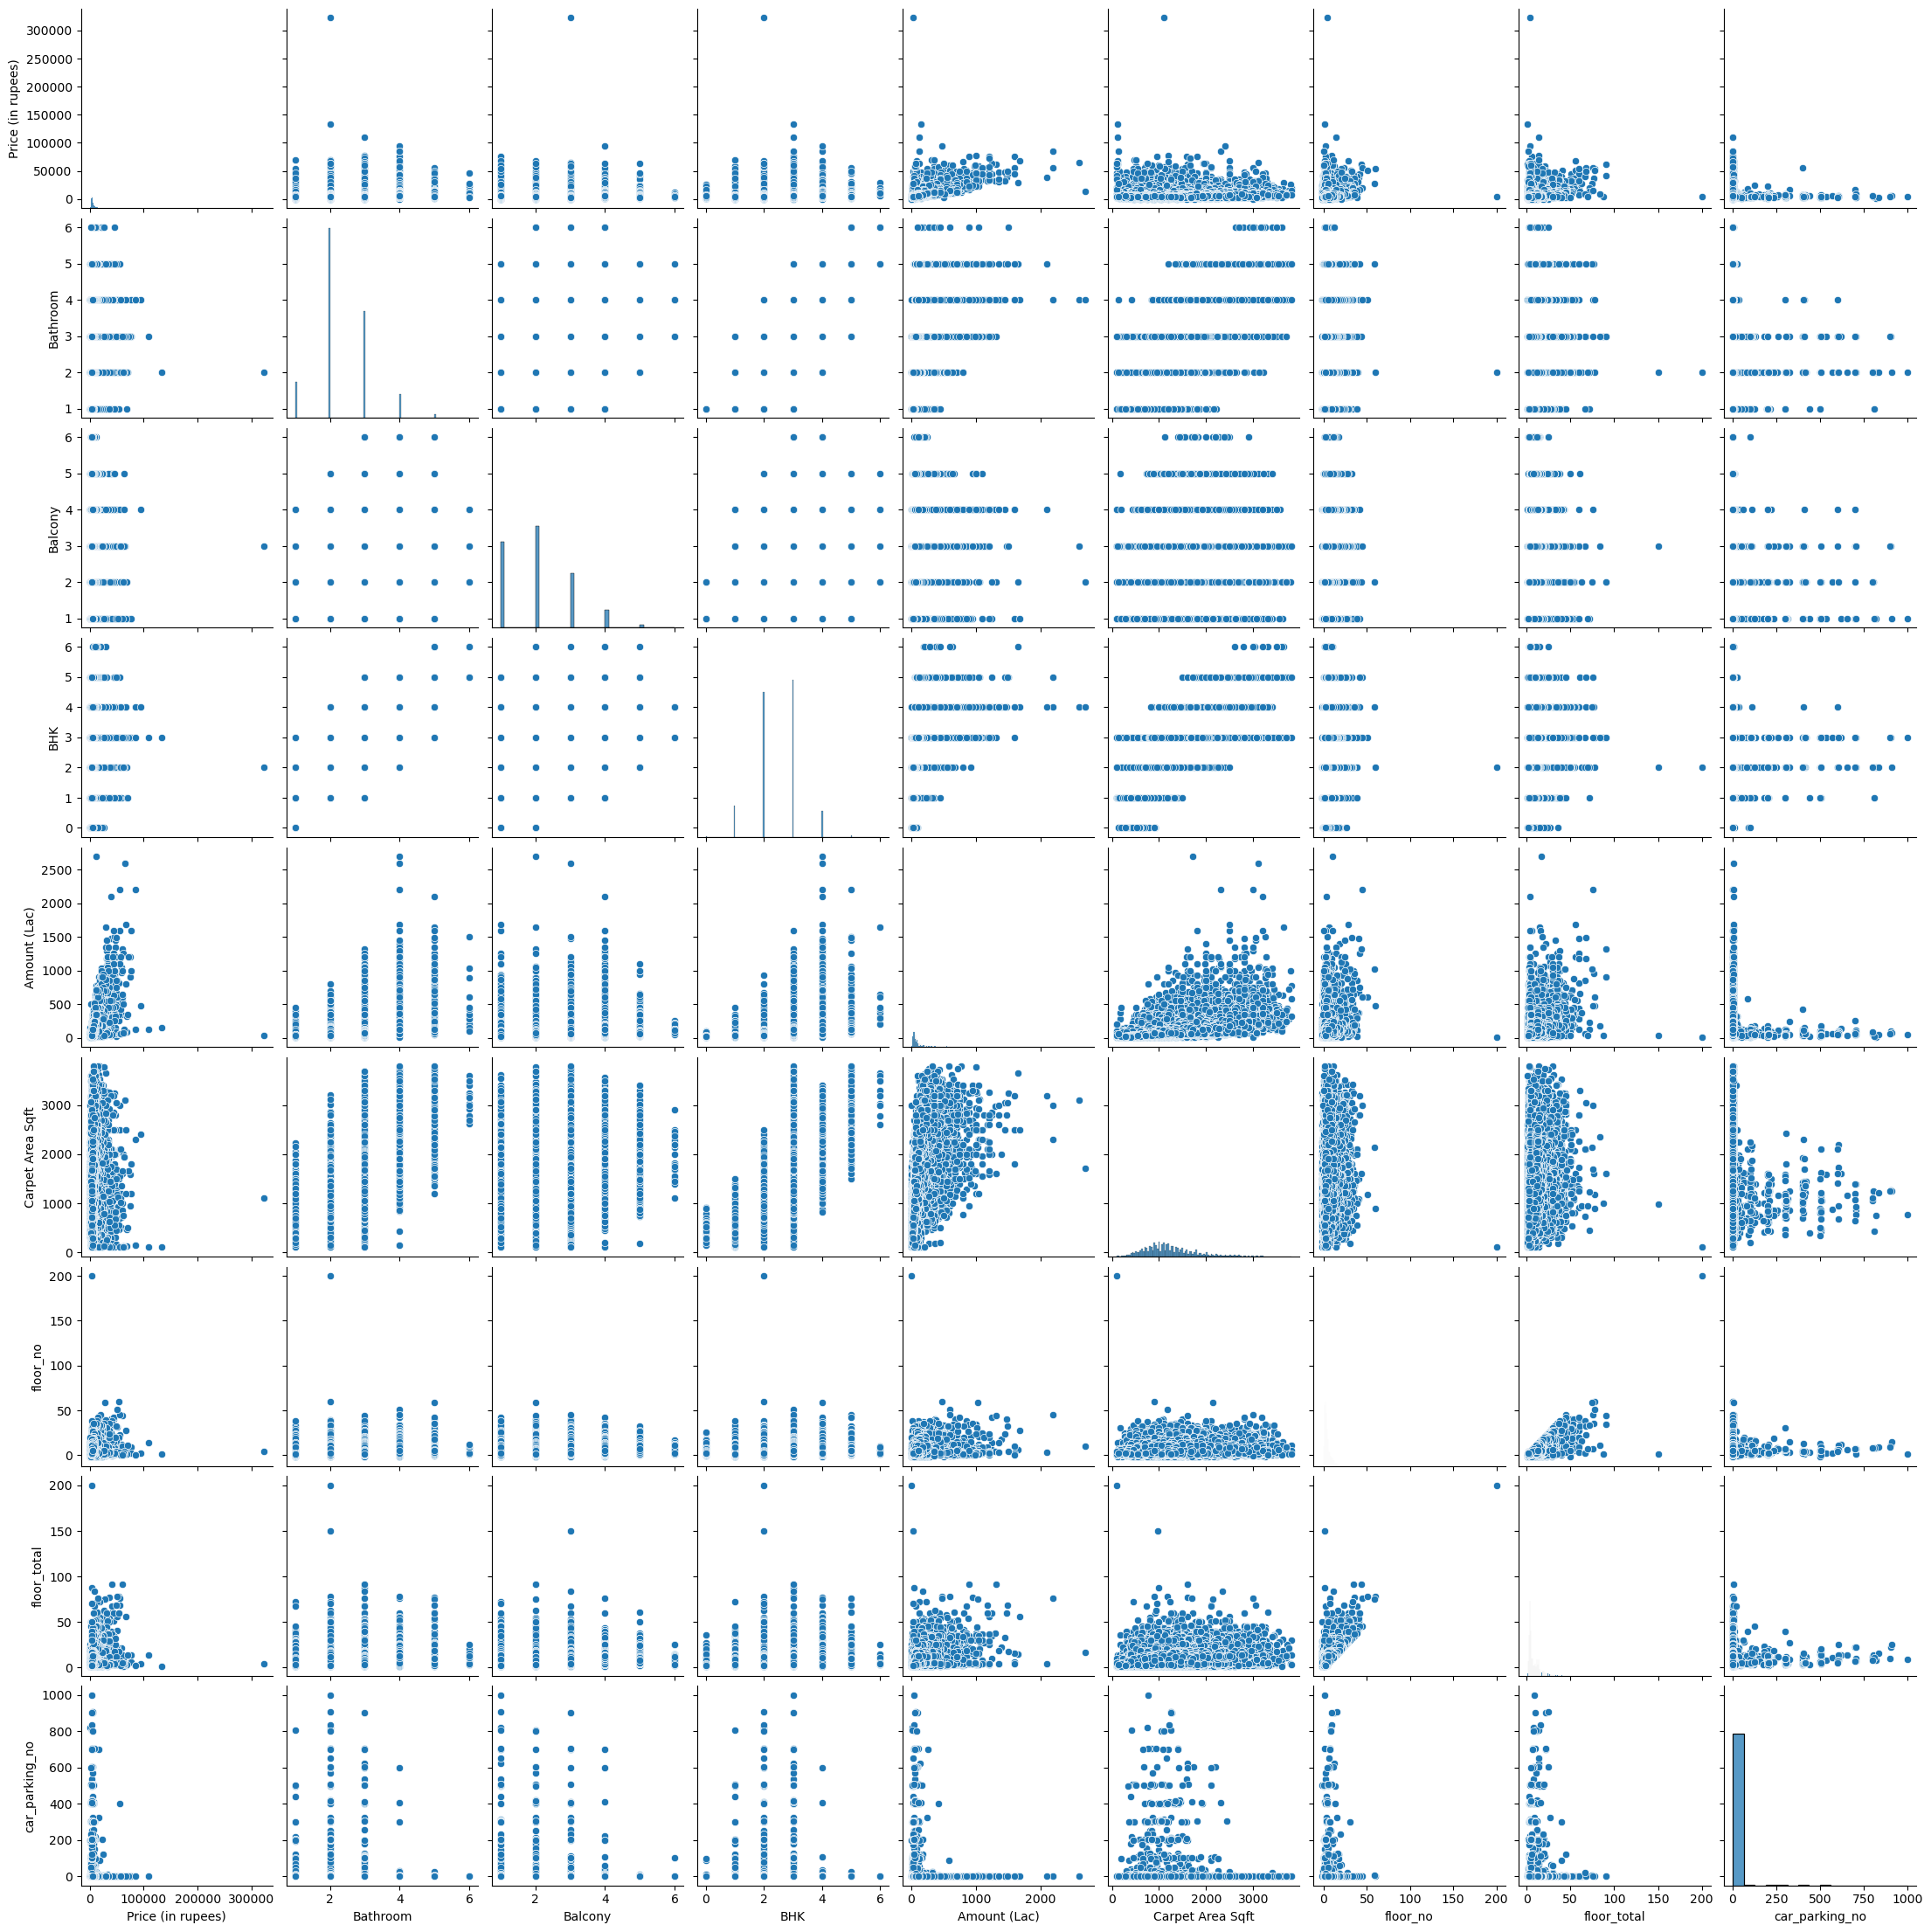

In [871]:
# multi-variate
sns.pairplot(df.select_dtypes(include='number'))

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [872]:
# a) Detect & Handle Duplicates
df.duplicated().sum()

0

In [873]:
#b) train_test_split
# regression problem: our target  will be 'Amount (Lac)' 


X = df.drop(['Amount (Lac)'], axis=1)
y = df['Amount (Lac)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train

Price (in rupees)    location         Status   Transaction  \
46917             3030.0      mohali  Ready to Move  New Property   
42910             4222.0    jabalpur  Ready to Move        Resale   
31434             7143.0  chandigarh  Ready to Move  New Property   
25445             6500.0       noida  Ready to Move        Resale   
44644            17500.0      kanpur  Ready to Move        Resale   
...                  ...         ...            ...           ...   
54343             3300.0       surat  Ready to Move        Resale   
38158             5202.0         goa  Ready to Move  New Property   
860              22414.0       thane  Ready to Move        Resale   
15795             4082.0      indore  Ready to Move        Resale   
56422             5719.0    vadodara  Ready to Move        Resale   

           Furnishing        facing                   overlooking  Bathroom  \
46917  Semi-Furnished  North - West        Main Road, Garden/Park       3.0   
42910  Semi-Furnished           NaN                           NaN       2.0   
31434     Unfurnished  North - East  Pool, Garden/Park, Main Road       4.0   
25445  Semi-Furnished  North - East        Main Road, Garden/Park       3.0   
44644     Unfurnished         North                   Garden/Park       3.0   
...               ...           ...                           ...       ...   
54343     Unfurnished  North - East        Main Road, Garden/Park       2.0   
38158     Unfurnished          East                     Main Road       2.0   
860    Semi-Furnished          West                           NaN       2.0   
15795       Furnished         South                     Main Road       3.0   
56422       Furnished          East                     Main Road       4.0   

       Balcony  Ownership  BHK  Carpet Area Sqft  floor_no  floor_total  \
46917      1.0   Freehold    3            1350.0       0.0          3.0   
42910      1.0        NaN    2             850.0       4.0          7.0   
31434      4.0   Freehold    4            2500.0       9.0         13.0   
25445      4.0  Leasehold    3            1000.0       2.0         18.0   
44644      3.0   Freehold    3            2065.0      19.0         24.0   
...        ...        ...  ...               ...       ...          ...   
54343      NaN   Freehold    2             610.0      14.0         14.0   
38158      2.0   Freehold    2             909.5       4.0          6.0   
860        2.0   Freehold    2             870.0      19.0         28.0   
15795      2.0   Freehold    3            1200.0       6.0          6.0   
56422      2.0   Freehold    4            2270.0       5.0          5.0   

       car_parking_no car_parking_type house_clusters  
46917             2.0             Open    distinctive  
42910             NaN              NaN        average  
31434             NaN              NaN        average  
25445             1.0          Covered    distinctive  
44644             NaN              NaN    distinctive  
...               ...              ...            ...  
54343             NaN              NaN       economic  
38158             1.0          Covered       economic  
860               1.0          Covered       economic  
15795             1.0          Covered    distinctive  
56422             2.0          Covered        average  

[49548 rows x 17 columns]

In [875]:
X_test.shape

(12388, 17)

In [876]:
y_train.isnull().sum()

0

In [877]:

from sklearn.base import BaseEstimator, TransformerMixin
class Handle_outliers_lb_ub(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1] 
        q1 = np.percentile(X, 25)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        ub_train = q3 + 1.5 * iqr
        lb_train = q1 - 1.5 * iqr
        self.ub_train = ub_train
        self.lb_train = lb_train
        return self # always return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        X[X > self.ub_train] = self.ub_train
        X[X < self.lb_train] = self.lb_train
        return X
    
h_lb_ub = Handle_outliers_lb_ub()
h_lb_ub

Handle_outliers_lb_ub()

In [878]:
class LogTransfomer(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):  # always return self
        # calculate what is needed to make .transform()
        # self.mean_ = np.mean(x)
        self.n_features_in_ = x.shape[1] 
        return self # always return self
    
    def transform(self, x, y=None):
        assert self.n_features_in_ == x.shape[1]
        return np.log1p(x)
    
log_transformer = LogTransfomer()
log_transformer

LogTransfomer()

In [879]:
df.columns

Index(['Price (in rupees)', 'location', 'Status', 'Transaction', 'Furnishing',
       'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership', 'BHK',
       'Amount (Lac)', 'Carpet Area Sqft', 'floor_no', 'floor_total',
       'car_parking_no', 'car_parking_type', 'house_clusters'],
      dtype='object')

In [882]:
#pipeline
# cat1: Bathroom, Balcony, BHK, floor_no, floor_total,car_parking_no  => categorical encoded data
# cat2:  ,Ownership,Furnishing,Transaction,Status 
# ,house_clusters=> orderE
#,car_parking_type=> orderE
# cat3:location , overlooking,facing => BE
# num1: Price (in rupees),Carpet Area Sqft=> right-skewed / outliers / 

# target: Amount (Lac) => right-skewed / outliers

cat_1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])

cat_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

cat_3_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('be', BinaryEncoder())
])
cat_4_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ore', OrdinalEncoder(categories=[['economic', 'average', 'distinctive' , 'luxury']]))
])
cat_5_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ore', OrdinalEncoder(categories=[['Open',  'Covered']]))
])
num1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('handle_outliers', LogTransfomer()),
    ('scale', RobustScaler())
])


target_pipeline = Pipeline(steps=[
    ('handle_outliers', LogTransfomer())
])

preprocessor = ColumnTransformer(transformers=[
    ("cat_no_change", cat_1_pipeline, ['Bathroom', 'Balcony', 'BHK', 'floor_no', 'floor_total' ,'car_parking_no']),
    ("cat_pipe", cat_2_pipeline, ['Ownership','Furnishing','Transaction','Status']),
    ("cat_pipe_ordh", cat_4_pipeline, ['house_clusters']),
    ("cat_pipe_ord", cat_5_pipeline, ['car_parking_type']),
    ("cat3_pipe", cat_3_pipeline, ['location' , 'overlooking','facing']),
    ("num_pipeline", num1_pipeline, ['Price (in rupees)','Carpet Area Sqft']),
    
])

preprocessor

ColumnTransformer(transformers=[('cat_no_change',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Bathroom', 'Balcony', 'BHK', 'floor_no',
                                  'floor_total', 'car_parking_no']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Ownership', 'Furnishin...
                                                                              'Covered']]))]),
                                 ['car_parking_type']),
                                ('cat3_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('be', BinaryEncoder())]),
                                 ['location', 'overlooking', 'facing']),
                                ('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['Price (in rupees)', 'Carpet Area Sqft'])])

In [883]:
# 1) Make Simple Model
lr_model = LinearRegression() 

X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

lr_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = lr_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {lr_model.score(X_train_preprocessed, y_train_preprocessed)}") # r2_score
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}") # mean_square_fare

Train Accuracy: 0.9392452488315629
Train Loss: 0.03303001997604744


In [884]:
# 2) Get validation accuracy to invstigate
# (Underfitting vs Overfitting (bias - variance tradeoff))

valid_losses = -1 * cross_val_score(LinearRegression(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(LinearRegression(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

valid_loss  valid_accuracy
count    5.000000        5.000000
mean     0.033100        0.939133
std      0.002196        0.003612
min      0.030335        0.935549
25%      0.031721        0.935739
50%      0.032875        0.938752
75%      0.035008        0.942265
max      0.035559        0.943360

In [885]:
#pipeline
# cat1: Bathroom, Balcony, BHK, floor_no, floor_total,car_parking_no  => categorical encoded data
# cat2:  ,Ownership,Furnishing,Transaction,Status 
# ,house_clusters=> orderE
#,car_parking_type=> orderE
# cat3:location , overlooking,facing => BE
# num1: Price (in rupees),Carpet Area Sqft=> right-skewed / outliers / 

# target: Amount (Lac) => right-skewed / outliers

cat_1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])

cat_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

cat_3_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('be', BinaryEncoder())
])
cat_4_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ore', OrdinalEncoder(categories=[['economic', 'average', 'distinctive' , 'luxury']]))
])
cat_5_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ore', OrdinalEncoder(categories=[['Open',  'Covered']]))
])
num1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('handle_outliers', LogTransfomer()),
    ('scale', RobustScaler())
])


target_pipeline = Pipeline(steps=[
    ('handle_outliers', LogTransfomer())
])

poly_preprocessor = ColumnTransformer(transformers=[
     ("cat_no_change", cat_1_pipeline, ['Bathroom', 'Balcony', 'BHK', 'floor_no', 'floor_total' ,'car_parking_no']),
    ("cat_pipe", cat_2_pipeline, ['Ownership','Furnishing','Transaction','Status']),
    ("cat_pipe_ordh", cat_4_pipeline, ['house_clusters']),
    ("cat_pipe_ord", cat_5_pipeline, ['car_parking_type']),
    ("cat3_pipe", cat_3_pipeline, ['location' , 'overlooking','facing']),
    ("num_pipeline", num1_pipeline, ['Price (in rupees)','Carpet Area Sqft']),
    
])

poly_preprocessor

ColumnTransformer(transformers=[('cat_no_change',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Bathroom', 'Balcony', 'BHK', 'floor_no',
                                  'floor_total', 'car_parking_no']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Ownership', 'Furnishin...
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('be', BinaryEncoder())]),
                                 ['location', 'overlooking', 'facing']),
                                ('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('handle_outliers',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['Price (in rupees)', 'Carpet Area Sqft'])])

In [886]:
# 2) polynomial features
lr_model_poly = LinearRegression() 

X_train_preprocessed_poly = poly_preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

lr_model_poly.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = lr_model_poly.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {lr_model_poly.score(X_train_preprocessed_poly, y_train_preprocessed)}") # r2_score
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}") # mean_square_fare

Train Accuracy: 0.9406314971155816
Train Loss: 0.032276370135791176


In [888]:
valid_losses = -1 * cross_val_score(lr_model_poly, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(lr_model_poly, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

valid_loss  valid_accuracy
count    5.000000        5.000000
mean     0.033816        0.937817
std      0.003815        0.006744
min      0.030623        0.926898
25%      0.031226        0.935989
50%      0.032093        0.940209
75%      0.035316        0.942822
max      0.039824        0.943166

In [891]:
# try regularization
ridge_lr_model = Ridge(alpha=0.001, random_state=42)

X_train_preprocessed_poly = poly_preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

ridge_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = ridge_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {ridge_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

Train Accuracy: 0.9397225905293017
Train Loss: 0.03277050766617055


In [892]:
valid_losses = -1 * cross_val_score(ridge_lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(ridge_lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

valid_loss  valid_accuracy
count    5.000000        5.000000
mean     0.032867        0.939559
std      0.002107        0.003457
min      0.030426        0.935880
25%      0.031373        0.936408
50%      0.032515        0.939422
75%      0.034644        0.942898
max      0.035377        0.943189

In [893]:
## lasso
lasso_lr_model = Lasso(alpha=0.0001, random_state=42,max_iter=10000)

X_train_preprocessed_poly = poly_preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

lasso_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = lasso_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {lasso_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(lasso_lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(lasso_lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"val Accuracy: {valid_scores.mean()}")
print(f"val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9392304138071907
Train Loss: 0.03303808520785124
val Accuracy: 0.9391222538835198
val Loss: 0.0331054806422046


In [894]:
# elasticnet
elasticnet_lr_model = ElasticNet(alpha=0.01, l1_ratio=0.05, random_state=42,max_iter=10000)  

X_train_preprocessed_poly = poly_preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

elasticnet_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = elasticnet_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {elasticnet_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(elasticnet_lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(elasticnet_lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"val Accuracy: {valid_scores.mean()}")
print(f"val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9389804936987253
Train Loss: 0.03317395715228808
val Accuracy: 0.9388962082029678
val Loss: 0.03322845197759206


In [897]:
# stocastic gradient
sgd_model = SGDRegressor(alpha=0.00001,eta0=0.000001,max_iter=10000,epsilon=1.0, random_state=42)

# X_train_copy = X_train[:10000] # as it took long time so i tried slice of data [proof of concept] (if model overfit then increaseing data will fit)
# y_train_copy = y_train[:10000]
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
sgd_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = sgd_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {sgd_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(sgd_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(sgd_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.05261476666520426
Train Loss: 0.5150568898769079
Val Accuracy : -0.00819737861652563
Val Loss: 0.5478658525365936


In [898]:
knn_model = KNeighborsRegressor(n_neighbors=21)
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
knn_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = knn_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {knn_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(knn_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(knn_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.868997777804853
Train Loss: 0.07122086639802165
Val Accuracy : 0.8484627405686404
Val Loss: 0.08236885451135917


In [899]:
# 14 min
svr_model = SVR()
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
svr_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = svr_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {svr_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(svr_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(svr_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9400598641791988
Train Loss: 0.032587144963184406
Val Accuracy : 0.9381030876148992
Val Loss: 0.03365816205949372


In [900]:
dt_model = DecisionTreeRegressor(max_depth=10,min_samples_split=10, min_samples_leaf=10,random_state=42)
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
dt_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = dt_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {dt_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(dt_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(dt_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.948466319462396
Train Loss: 0.0280168787602672
Val Accuracy : 0.935273786889474
Val Loss: 0.03518820063382376


In [901]:
# Bagging
# 7 min
rf_model = RandomForestRegressor()
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
rf_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = rf_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {rf_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(rf_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(rf_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9935141545881421
Train Loss: 0.003526104533311224
Val Accuracy : 0.9516890026397693
Val Loss: 0.026275931313423224


In [902]:
# tuning hyper pramerers to solve overfitting # max_depth=10 the best
rf_model = RandomForestRegressor(max_depth=5,min_samples_split=10,min_samples_leaf=10,random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
rf_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = rf_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {rf_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(rf_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(rf_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")


Train Accuracy: 0.9037887955801888
Train Loss: 0.05230632901607348
Val Accuracy : 0.9027634711684918
Val Loss: 0.05284790091271391


In [903]:
# 14 min
# gridsearch on rf
# RF
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
    ])


params_grid = {#'model__n_estimators': [10,20,30],
               'model__n_estimators': [30,40,50],
               #'model__max_depth':[3,4,5],
               'model__max_depth':[5,7,10],
               
               'model__min_samples_split':[4,8,10],
               'model__min_samples_leaf':[3, 5, 10],
               }





y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
rf_grid = GridSearchCV(rf_pipeline, params_grid, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train_preprocessed)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Bathroom',
                                                                          'Balcony',
                                                                          'BHK',
                                                                          'floor_no',
                                                                          'floor_total',
                                                                          'car_parking_no']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['Price '
                                                                          '(in '
                                                                          'rupees)',
                                                                          'Carpet '
                                                                          'Area '
                                                                          'Sqft'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [5, 7, 10],
                         'model__min_samples_leaf': [3, 5, 10],
                         'model__min_samples_split': [4, 8, 10],
                         'model__n_estimators': [30, 40, 50]},
             scoring='neg_mean_squared_error')

In [904]:
rf_grid.best_score_

-0.028930745930899626

In [906]:
rf_grid.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 4,
 'model__n_estimators': 50}

In [907]:
rf_model = RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_split=4,min_samples_leaf=3,random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
rf_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = rf_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {rf_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(rf_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(rf_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")


Train Accuracy: 0.9583578410254784
Train Loss: 0.02263923917589432
Val Accuracy : 0.9469629968479509
Val Loss: 0.028837222244219834


In [908]:
# Boosting
gb_model = GradientBoostingRegressor(alpha=0.01,max_depth=4,random_state=42)
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
gb_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = gb_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {gb_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(gb_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(gb_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")



Train Accuracy: 0.9521367062514023
Train Loss: 0.02602143072321425
Val Accuracy : 0.9466811818796785
Val Loss: 0.028990002709630137


In [909]:
# 30 min
# gridsearch on gb
#gb
gb_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
    ])


params_grid = {#'model__n_estimators': [10,20,30],
               'model__n_estimators': [100,200,300],
               #'model__max_depth':[3,4,5],
               'model__max_depth':[4,7,10],
               'model__alpha':[0.1,0.01,0.001],
            #    'model__min_samples_split':[4,8,10],
            #    'model__min_samples_leaf':[3, 5, 10],
               }





y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
gb_grid = GridSearchCV(gb_pipeline, params_grid, cv=3, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, y_train_preprocessed)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Bathroom',
                                                                          'Balcony',
                                                                          'BHK',
                                                                          'floor_no',
                                                                          'floor_total',
                                                                          'car_parking_no']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder...
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['Price '
                                                                          '(in '
                                                                          'rupees)',
                                                                          'Carpet '
                                                                          'Area '
                                                                          'Sqft'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'model__alpha': [0.1, 0.01, 0.001],
                         'model__max_depth': [4, 7, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [910]:
gb_grid.best_params_

{'model__alpha': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300}

In [912]:
gb_grid.best_score_

-0.02361701627225057

In [913]:
gb_model = GradientBoostingRegressor(n_estimators=300,alpha=0.1,max_depth=7,random_state=42) 
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
gb_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = gb_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {gb_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(gb_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(gb_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9766620844577081
Train Loss: 0.012687926487001656
Val Accuracy : 0.9565773839348287
Val Loss: 0.023609694359374718


In [917]:
gb_model = GradientBoostingRegressor(max_depth=4,learning_rate=0.5,random_state=42) 
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
gb_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = gb_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {gb_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(gb_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(gb_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9599730018767111
Train Loss: 0.021761138382874176
Val Accuracy : 0.9478762094098588
Val Loss: 0.028336604750795948


In [918]:
# Voting
voting_reg = VotingRegressor(estimators=[
    
    ('RF', RandomForestRegressor(n_estimators=50,max_depth=9,min_samples_split=10,min_samples_leaf=5,random_state=42)),
    ('dt', DecisionTreeRegressor(max_depth=8,random_state=42)),
    ('GradientBoostingTree', GradientBoostingRegressor(learning_rate=0.5,max_depth=4,random_state=42)),
    ],
   
    n_jobs=-1
)

voting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ("model", voting_reg) 
    ])


In [919]:
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()

voting_pipeline.fit(X_train, y_train_preprocessed)
y_train_pred = voting_pipeline.predict(X_train)

print(f"Train Accuracy: {voting_pipeline.score(X_train, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(voting_pipeline, X_train, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(voting_pipeline, X_train, y_train_preprocessed, cv=5, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.955050771287114
Train Loss: 0.024437165715293977
Val Accuracy : 0.945654348676326
Val Loss: 0.029547930647550447


In [ ]:
# Stacking
stacking_reg = StackingRegressor(estimators=[
    ('ridge', Ridge(alpha=0.001, random_state=42)),
    ('RF', RandomForestRegressor(n_estimators=50,max_depth=9,min_samples_split=10,min_samples_leaf=5,random_state=42)),
    ('dt', DecisionTreeRegressor(max_depth=8,random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.5,max_depth=4,random_state=42)),
    ],
   
    #final_estimator=GradientBoostingRegressor(n_estimators=200,learning_rate=0.5,max_depth=5,random_state=42),
    cv=3,
    n_jobs=-1
)

stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ("model", stacking_reg) 
    ])

In [ ]:

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
stacking_pipeline.fit(X_train, y_train_preprocessed)
y_train_pred = stacking_pipeline.predict(X_train)

print(f"Train Accuracy: {stacking_pipeline.score(X_train, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(stacking_pipeline, X_train, y_train_preprocessed, cv=3, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(stacking_pipeline, X_train, y_train_preprocessed, cv=3, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9591871552052615
Train Loss: 0.02218837297369861
Val Accuracy : 0.9501028953688048
Val Loss: 0.02713133493117816


In [922]:
stacking_reg_2 = StackingRegressor(estimators=[
    ('ridge', Ridge(alpha=0.001, random_state=42)),
    ('RF', RandomForestRegressor(n_estimators=50,max_depth=9,min_samples_split=10,min_samples_leaf=5,random_state=42)),
    ('dt', DecisionTreeRegressor(max_depth=8,random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.5,max_depth=4,random_state=42)),
    ],
   
    final_estimator=GradientBoostingRegressor(n_estimators=300,alpha=0.1,max_depth=7,random_state=42),
    cv=3,
    n_jobs=-1
)

stacking_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ("model", stacking_reg_2) 
    ])

In [923]:
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_train_preprocessed = y_train_preprocessed.ravel()
stacking_pipeline_2.fit(X_train, y_train_preprocessed)
y_train_pred = stacking_pipeline_2.predict(X_train)

print(f"Train Accuracy: {stacking_pipeline_2.score(X_train, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
valid_losses = -1 * cross_val_score(stacking_pipeline_2, X_train, y_train_preprocessed, cv=3, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(stacking_pipeline_2, X_train, y_train_preprocessed, cv=3, scoring='r2')
#pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()
print(f"Val Accuracy : {valid_scores.mean()}")
print(f"Val Loss: {valid_losses.mean()}")

Train Accuracy: 0.9577503141009394
Train Loss: 0.022969528183216178
Val Accuracy : 0.9460177022163192
Val Loss: 0.029350217360902136


# Test Accuracy

In [927]:
# stacking_pipeline is the best model
y_test_pred = stacking_pipeline.predict(X_test)


y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1))


print(f"Test Accuracy: {r2_score(y_true=y_test_preprocessed, y_pred=y_test_pred) * 100}")
print(f"Test Loss: {mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)}")

Test Accuracy: 94.95578656294838
Test Loss: 0.02753182004762677


In [928]:
# confidence interval of test loss
y_pred_normal = np.exp(y_test_pred)
print(f"Maximum Diffrence Between my model prediciton and any new point: +/- {np.sqrt(mean_squared_error(y_test, y_pred_normal))}")

Maximum Diffrence Between my model prediciton and any new point: +/- 24.622126927992824


In [929]:
confidence = 0.95
losses = (y_test_pred - y_test_preprocessed) ** 2

np.exp(np.sqrt(stats.t.interval(confidence, len(losses) - 1, loc=np.mean(losses), scale=stats.sem(losses))))

array([[2.79282077, 2.77200957, 2.7904543 , ..., 2.78571433, 2.78235718,
        2.77708467],
       [2.83337098, 2.85419719, 2.83573865, ..., 2.84048141, 2.84384086,
        2.8491175 ]])

In [930]:
df

Price (in rupees)  location         Status   Transaction  \
0                 6000.0     thane  Ready to Move        Resale   
1                13799.0     thane  Ready to Move        Resale   
2                17500.0     thane  Ready to Move        Resale   
3                    NaN     thane  Ready to Move        Resale   
4                18824.0     thane  Ready to Move        Resale   
...                  ...       ...            ...           ...   
61931             3225.0  zirakpur  Ready to Move  New Property   
61932             3274.0  zirakpur  Ready to Move        Resale   
61933             4343.0  zirakpur  Ready to Move        Resale   
61934             4231.0  zirakpur  Ready to Move        Resale   
61935             6162.0  zirakpur  Ready to Move        Resale   

           Furnishing        facing             overlooking  Bathroom  \
0         Unfurnished           NaN                     NaN       1.0   
1      Semi-Furnished          East             Garden/Park       2.0   
2         Unfurnished          East             Garden/Park       2.0   
3         Unfurnished           NaN                     NaN       1.0   
4         Unfurnished          West  Main Road, Garden/Park       2.0   
...               ...           ...                     ...       ...   
61931  Semi-Furnished          East             Garden/Park       3.0   
61932     Unfurnished  North - East  Main Road, Garden/Park       3.0   
61933       Furnished          East  Main Road, Garden/Park       3.0   
61934  Semi-Furnished           NaN               Main Road       2.0   
61935  Semi-Furnished  North - East       Pool, Garden/Park       4.0   

       Balcony             Ownership  BHK  Amount (Lac)  Carpet Area Sqft  \
0          2.0                   NaN    1          42.0             500.0   
1          NaN              Freehold    2          98.0             473.0   
2          NaN              Freehold    2         140.0             779.0   
3          1.0                   NaN    1          25.0             530.0   
4          NaN  Co-operative Society    2         160.0             635.0   
...        ...                   ...  ...           ...               ...   
61931      3.0              Freehold    3          63.0            1953.0   
61932      NaN                   NaN    3          55.0            1680.0   
61933      2.0              Freehold    3          76.0            1250.0   
61934      NaN                   NaN    2          30.0             709.0   
61935      4.0              Freehold    3         118.0            1915.0   

       floor_no  floor_total  car_parking_no car_parking_type house_clusters  
0          10.0         11.0             NaN              NaN        average  
1           3.0         22.0             1.0             Open       economic  
2          10.0         29.0             1.0          Covered       economic  
3           1.0          3.0             NaN              NaN        average  
4          20.0         42.0             1.0          Covered       economic  
...         ...          ...             ...              ...            ...  
61931       2.0          4.0             1.0          Covered    distinctive  
61932       4.0          6.0             1.0          Covered    distinctive  
61933       1.0          3.0             1.0          Covered    distinctive  
61934       2.0          2.0             NaN              NaN       economic  
61935       5.0         13.0             1.0          Covered    distinctive  

[61936 rows x 18 columns]

In [931]:
#test point
#6000.0	thane	Ready to Move	Resale	Unfurnished	NaN	NaN	1.0	2.0	NaN	1	42.0	500.0	10.0	11.0	NaN	NaN	0.002000 average
columns = ['Price (in rupees)', 'location', 'Status', 'Transaction', 'Furnishing','facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership', 'BHK', 'Carpet Area Sqft', 'floor_no', 'floor_total',
       'car_parking_no', 'car_parking_type','house_clusters']
data = pd.DataFrame([[6000.0,'thane','Ready to Move','Resale','Unfurnished',	'East','Main Road' ,	1.0 ,	2.0 ,	'Freehold',1,500.0 ,10.0,	11.0,	1.0 ,	'Covered','average']], columns=columns)
pred = np.exp(stacking_pipeline.predict(data).ravel()[0])
pred

34.31555806164147

In [932]:
#save model
joblib.dump(stacking_pipeline, "stacking_final_project.pkl")

['stacking_final_project.pkl']

In [ ]:
df.to_csv("factors.csv")

In [ ]:
stop 12-2-2025